In [1]:
# 데이터 로드
df <- mtcars
head(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


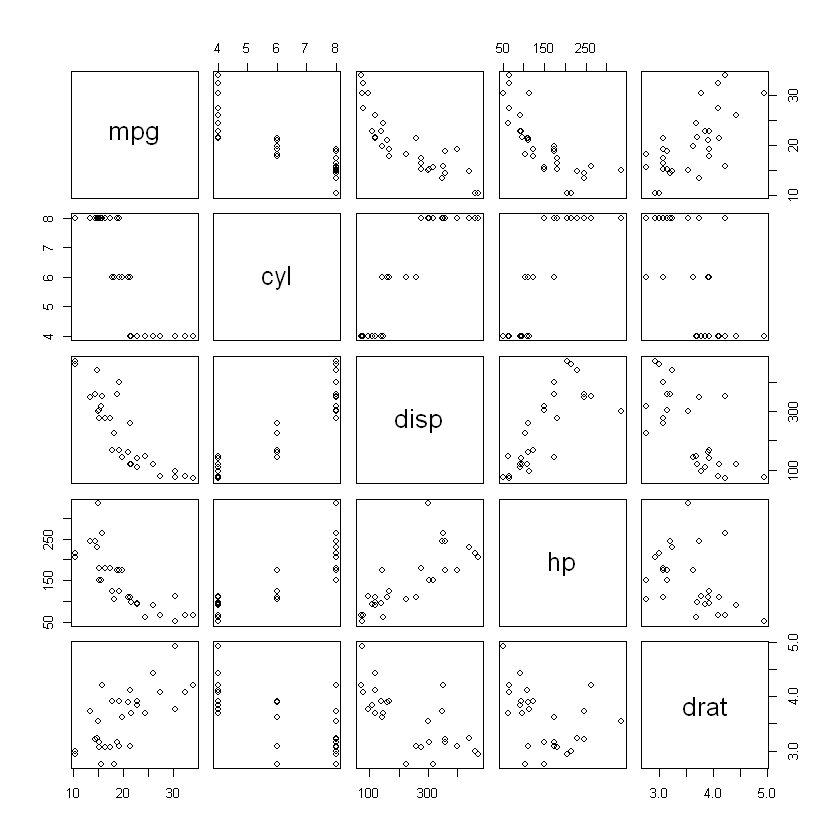

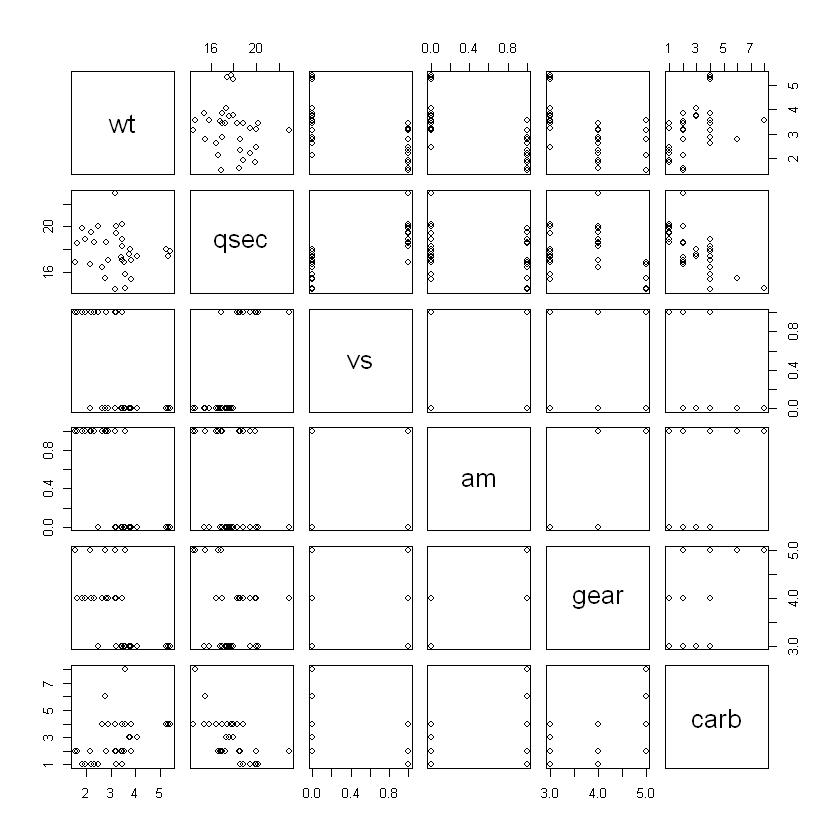

In [2]:
# 모든 변수 산점도 그리기
plot(df[,c(1:5)])
plot(df[,c(6:11)])

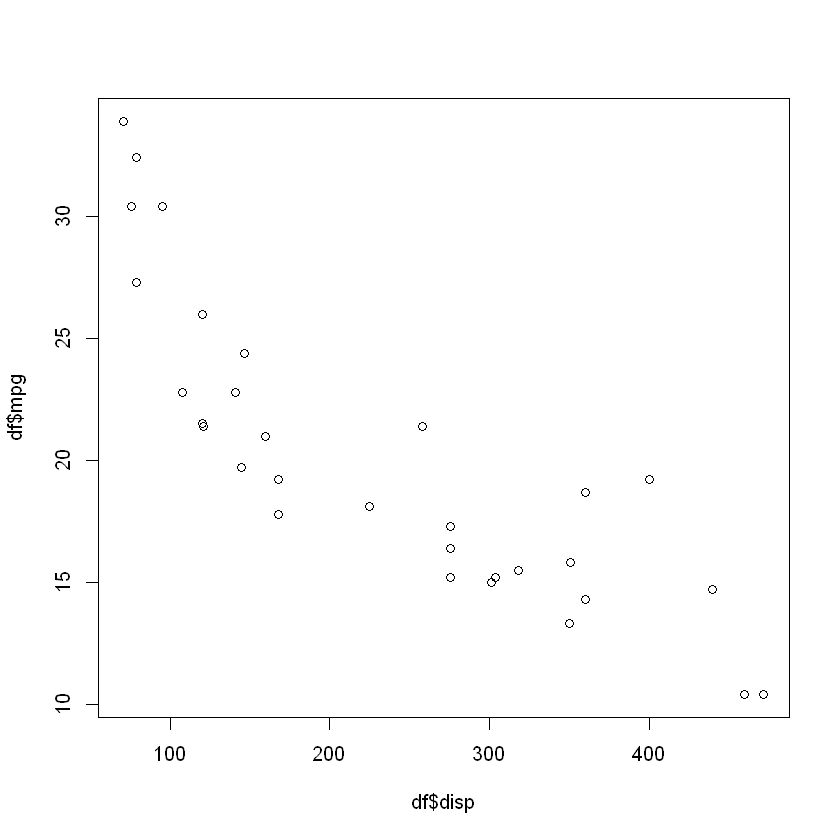

In [3]:
# mpg~disp 상관 관계 높아 보여 따로 그리기
plot(df$mpg~df$disp)

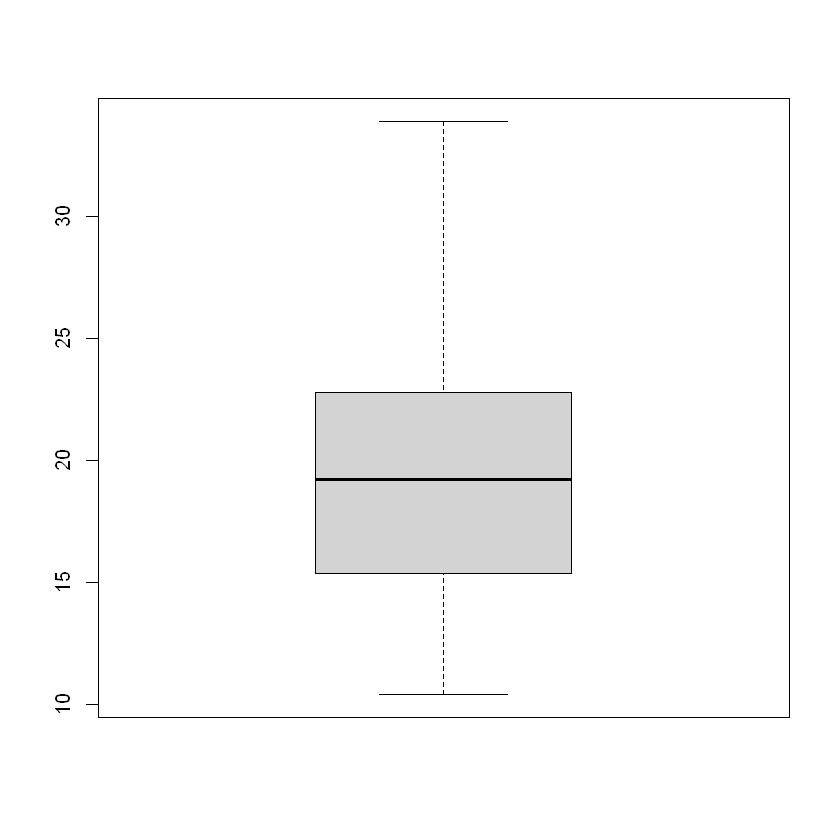

In [4]:
# mpg 아웃라이어 확인 - 아웃라이어는 없고 데이터가 위쪽에 좀더 분산되어 있음
boxplot(df$mpg)

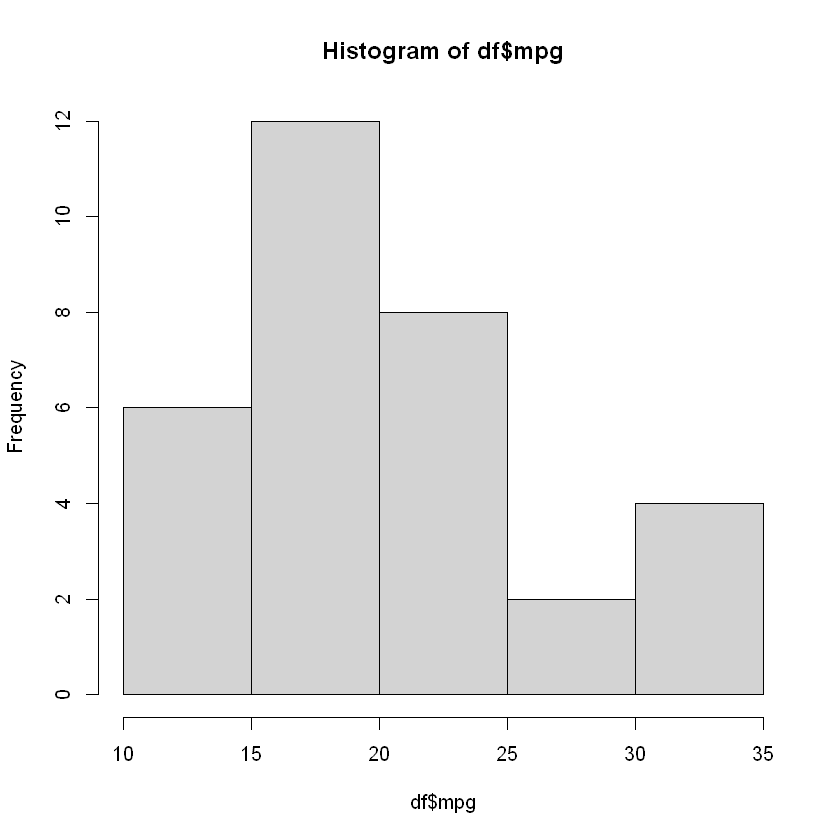

In [5]:
# 히스토그램은 분산 상태 확인
hist(df$mpg)

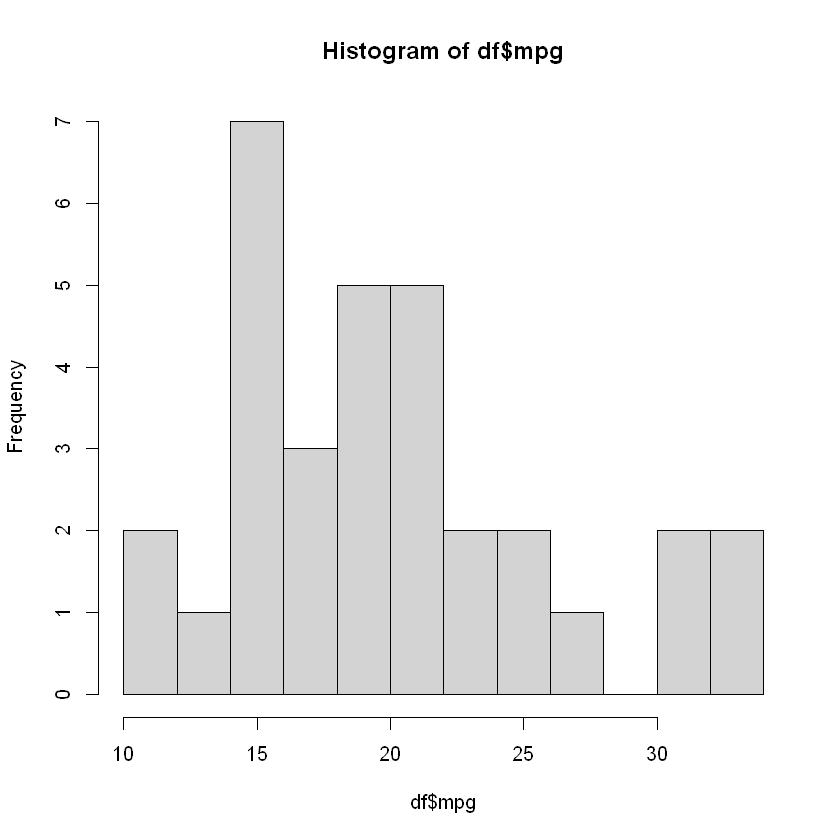

In [6]:
# 히스토그램은 분산 상태 확인 2
hist(df$mpg, breaks = 10)

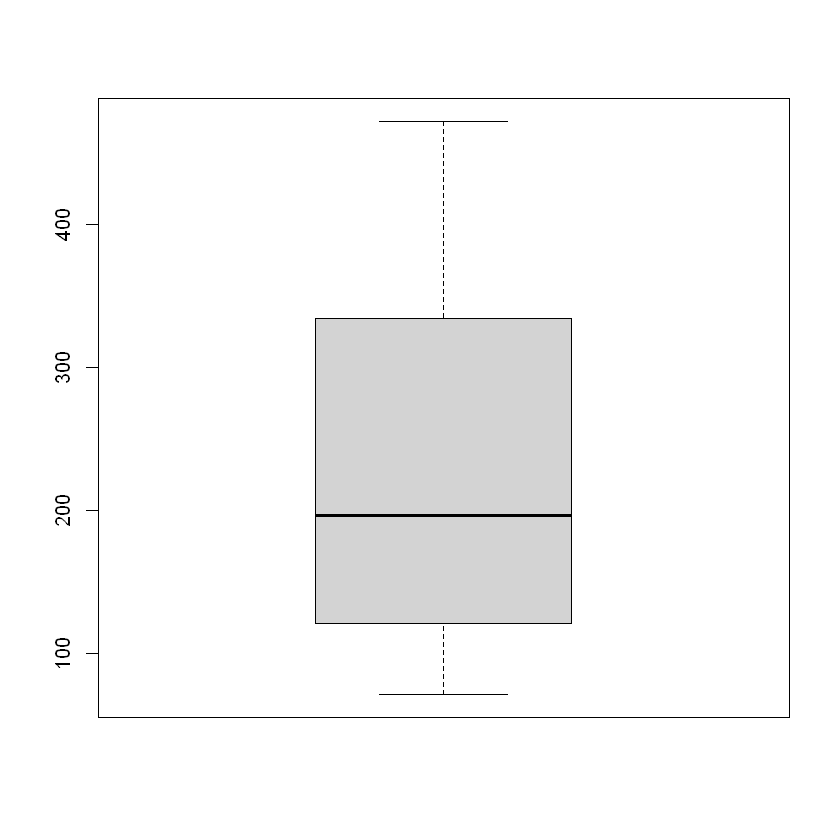

In [7]:
# disp 아웃라이어 확인 - 아웃라이어는 없고 110~320에 몰려 있음
boxplot(df$disp)

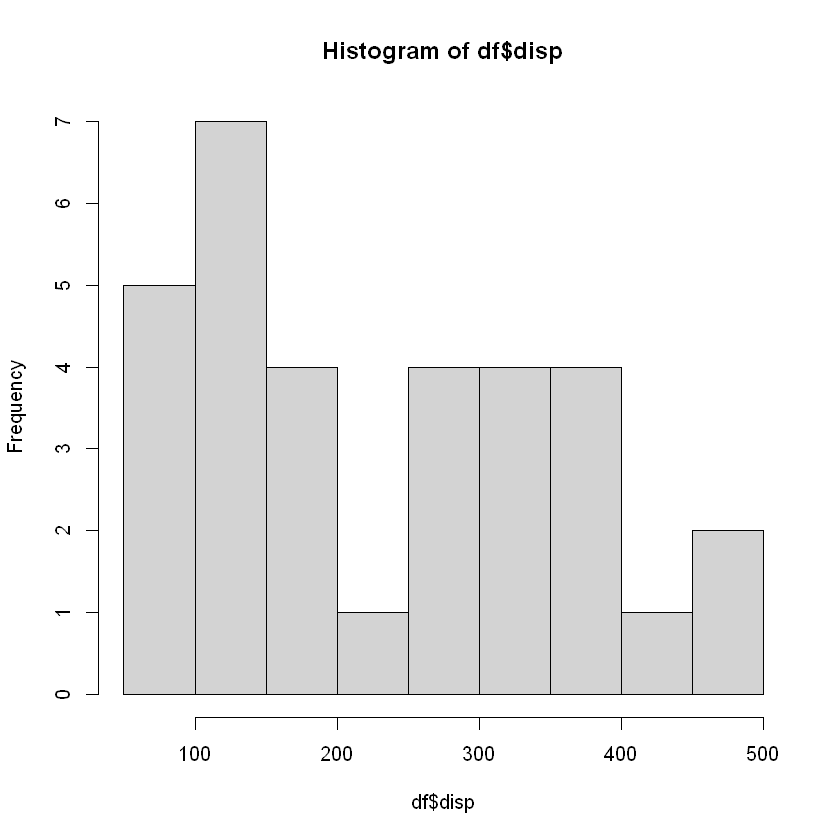

In [8]:
hist(df$disp)

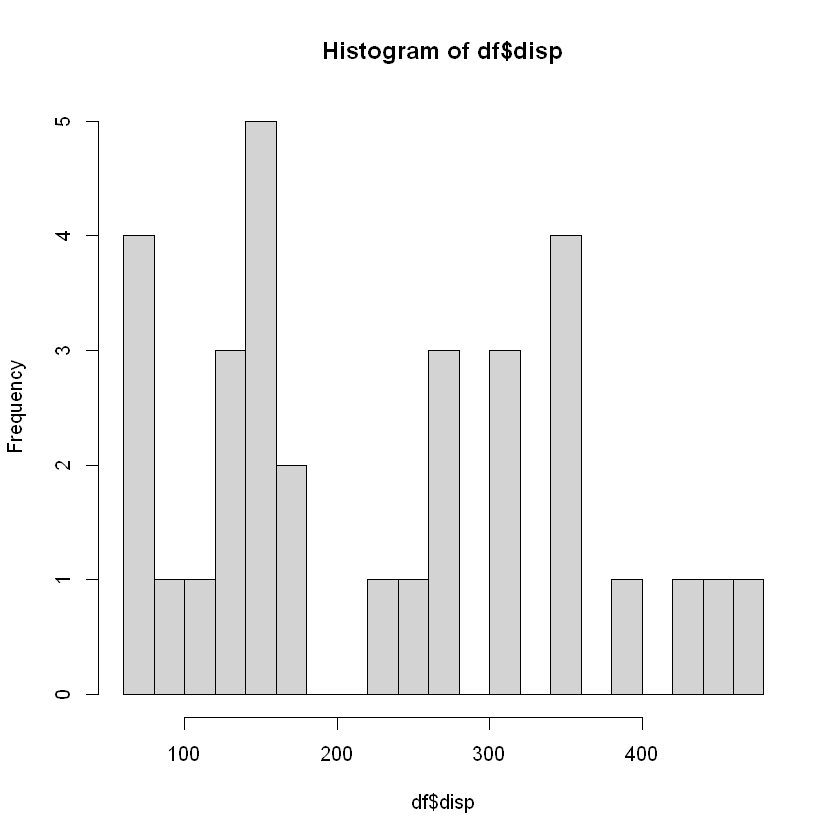

In [9]:
hist(df$disp, breaks = 20)

### mpg, disp
- 두 변수 모두 이상점 없음
- 두 변수 상관관계가 있음을 방해하는 요소는 없어 보임
- 확증을 하기 위해서는 가설검증과 회귀분석 진행
- EDA 단계는 증거를 수집하고 특징을 찾는 것


## 다이몬드 데이터 분석하기 - 가격에 영향을 미치는 것은 ?
### DataSet : diamonds
- ggplot2 패키지에 포함
- 캐럿, 가격, 컷팅방법, 컬러등 다이아몬드 정보


In [10]:
library('ggplot2')


In [11]:
# 데이터 로드
df <- diamonds
str(df)


tibble [53,940 x 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


In [12]:
# 관측치가 많아 Data 임의개수 추출 - sample(10, 2) 10개중 2개 추출
Sample <- df[sample(nrow(df), 300),] # 53940 중 300개 추출
attach(Sample)


In [13]:
str(Sample)

tibble [300 x 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:300] 0.78 0.32 1.08 0.82 1.02 0.35 1.53 0.7 1.05 0.32 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 3 3 5 5 1 1 3 3 4 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 3 2 1 4 7 3 4 4 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 5 3 3 2 3 4 5 5 2 5 ...
 $ depth  : num [1:300] 60.9 63.4 62.7 62.1 66.4 65.9 59.5 62.2 60.7 61.9 ...
 $ table  : num [1:300] 57 55 57 56 60 54 60 58 61 56 ...
 $ price  : int [1:300] 3420 720 5534 2937 4798 1415 7677 2889 3599 660 ...
 $ x      : num [1:300] 5.94 4.36 6.53 6.01 6.29 5.57 7.55 5.64 6.56 4.41 ...
 $ y      : num [1:300] 5.88 4.35 6.57 5.98 6.21 5.53 7.65 5.75 6.52 4.45 ...
 $ z      : num [1:300] 3.59 2.76 4.11 3.72 4.15 3.66 4.52 3.54 3.97 2.74 ...


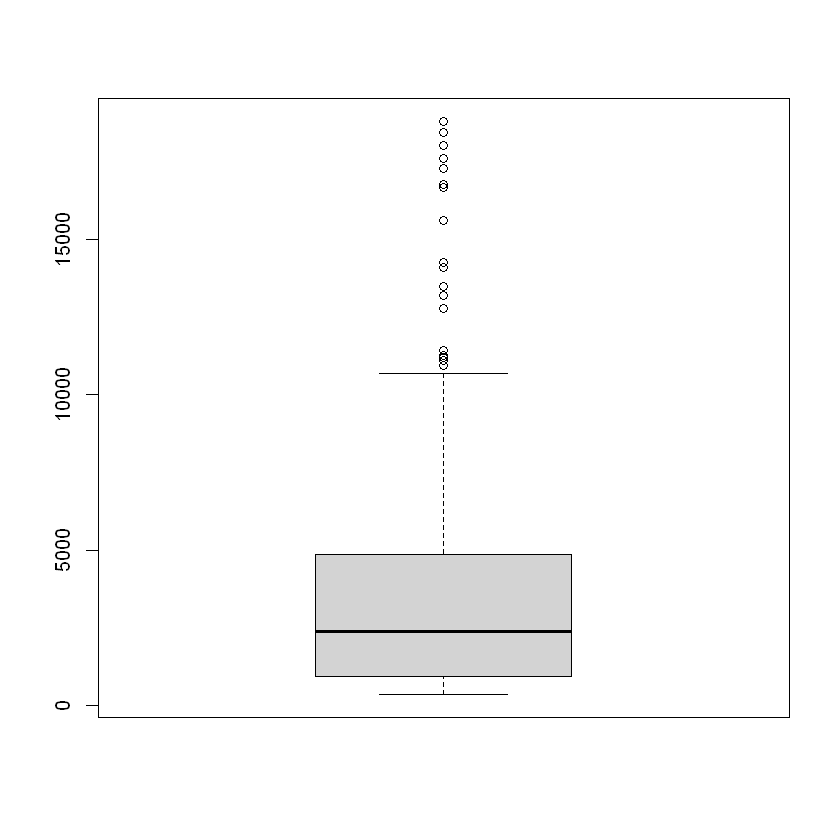

In [14]:
# 가격 분석
boxplot(price)

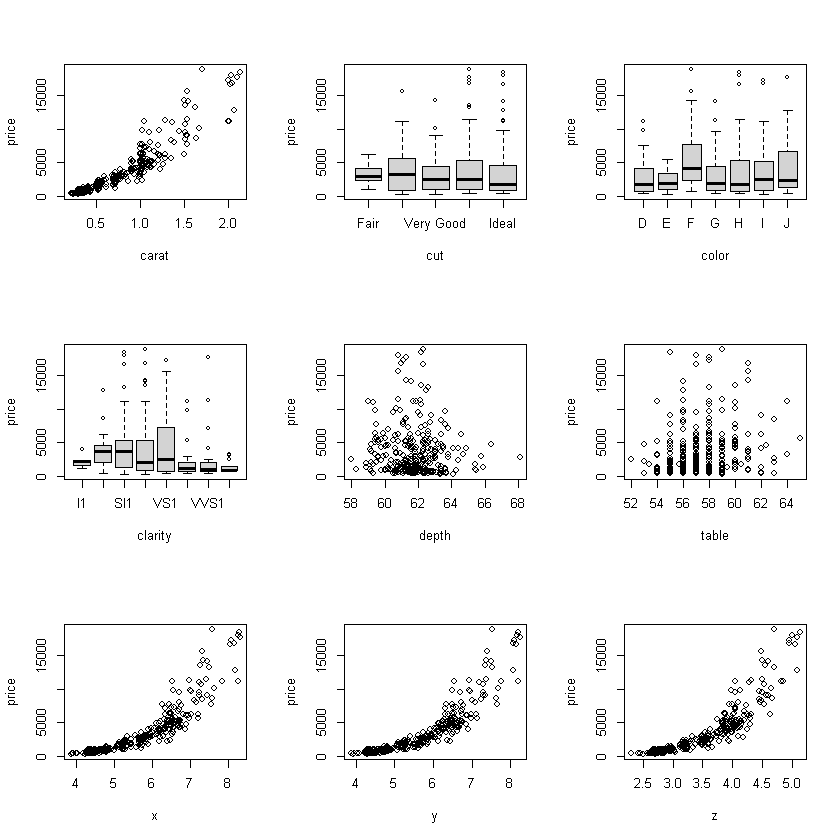

In [15]:
# 가격 이상치 - EDA로 원인 찾기
# price 와 관련된 그래프 그리기
par(mfrow = c(3,3))
plot(data=Sample, price~.) # y축(종속변수) price


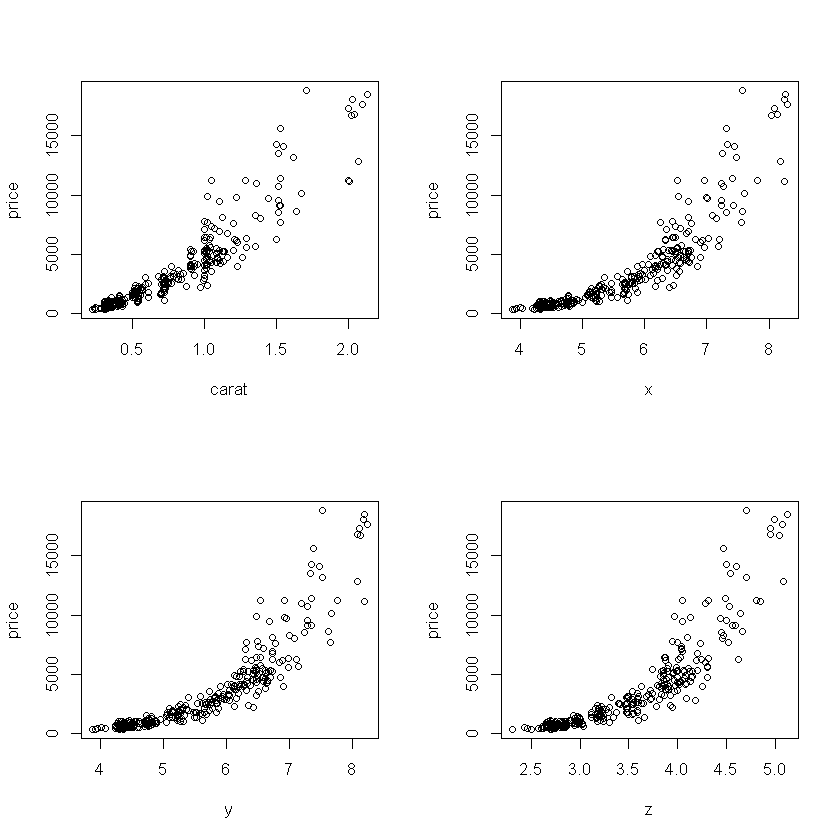

In [16]:
# price 에 carat, x, y, z 등이 영항이 있어 보임
par(mfrow = c(2,2))
plot(price~carat+x+y+z)

In [17]:
# 상관 계수 구하기
Sample2 <- data.frame(price, carat, x, y, z)
cor(Sample2)

,price,carat,x,y,z
price,1.0000000,0.9222848,0.8717443,0.8736299,0.8662460
carat,0.9222848,1.0000000,0.9786572,0.9778729,0.9760895
x,0.8717443,0.9786572,1.0000000,0.9988504,0.9919651
y,0.8736299,0.9778729,0.9988504,1.0000000,0.9912424
z,0.8662460,0.9760895,0.9919651,0.9912424,1.0000000


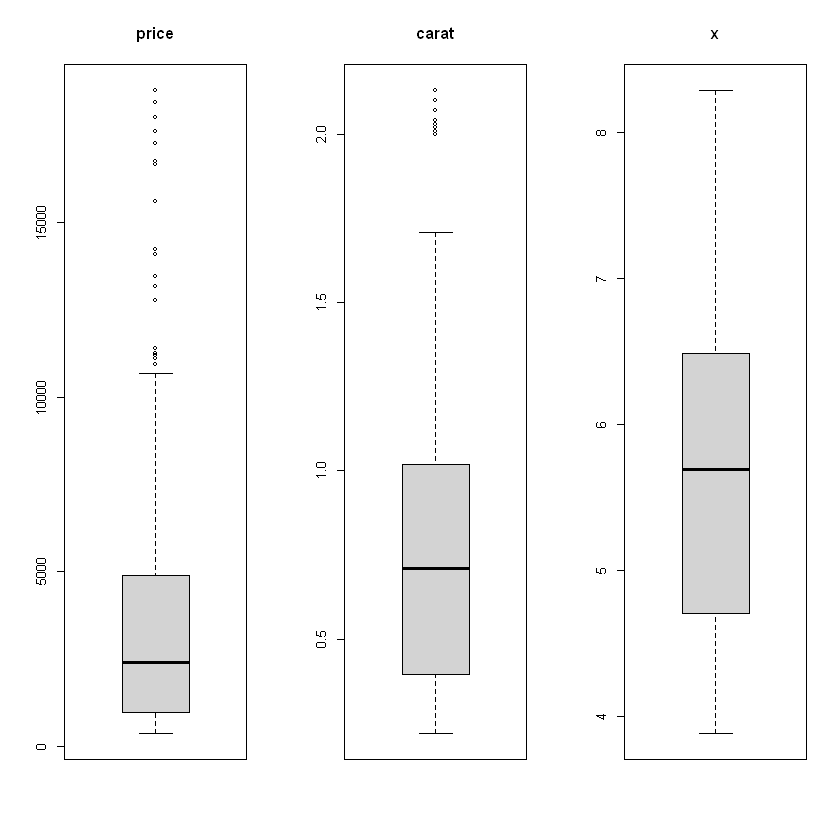

In [18]:
# price, carat, x 특징 파악
par(mfrow = c(1,3))
boxplot(price, main='price')
boxplot(carat, main='carat')
boxplot(x, main='x')

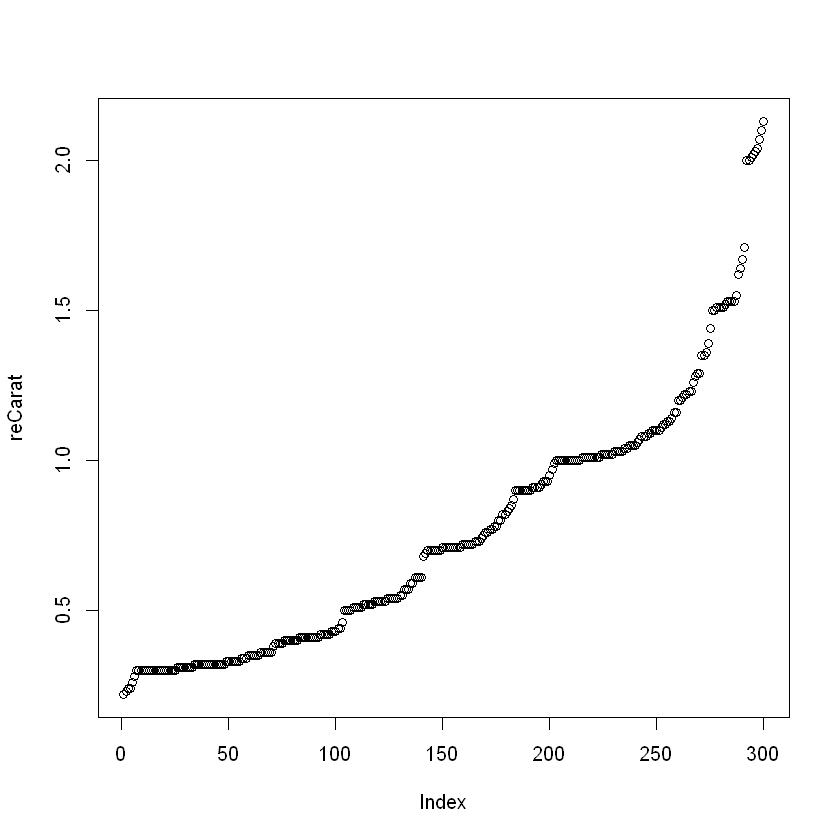

In [19]:
# carat 오름차순 정렬
reCarat <- carat[order(carat)]
par(mfrow = c(1,1))
plot(reCarat)

carat 이 2차 함수와 비슷

carat 이 올라갈수록 값이 급격히 커짐

이런 성향 때문에 이상치 발생 예상

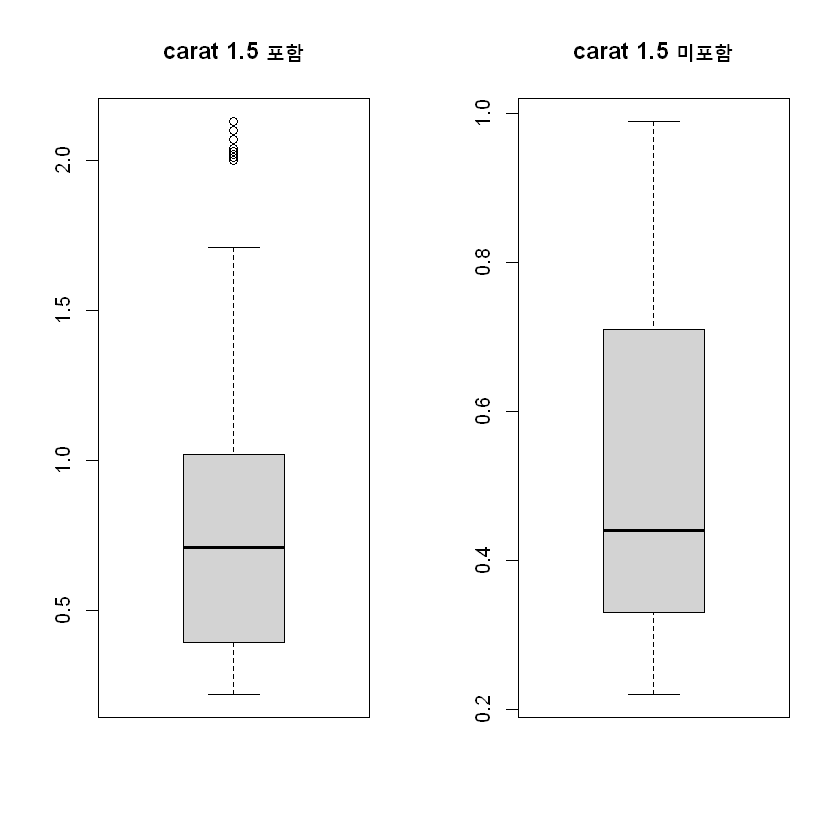

In [20]:
# carat 값 급격히 커지는 부분 제거
Sample2 <- subset(Sample, subset = (Sample$carat <1.0))
par(mfrow = c(1,2))
boxplot(Sample$carat, main='carat 1.5 포함')
boxplot(Sample2$carat, main='carat 1.5 미포함')


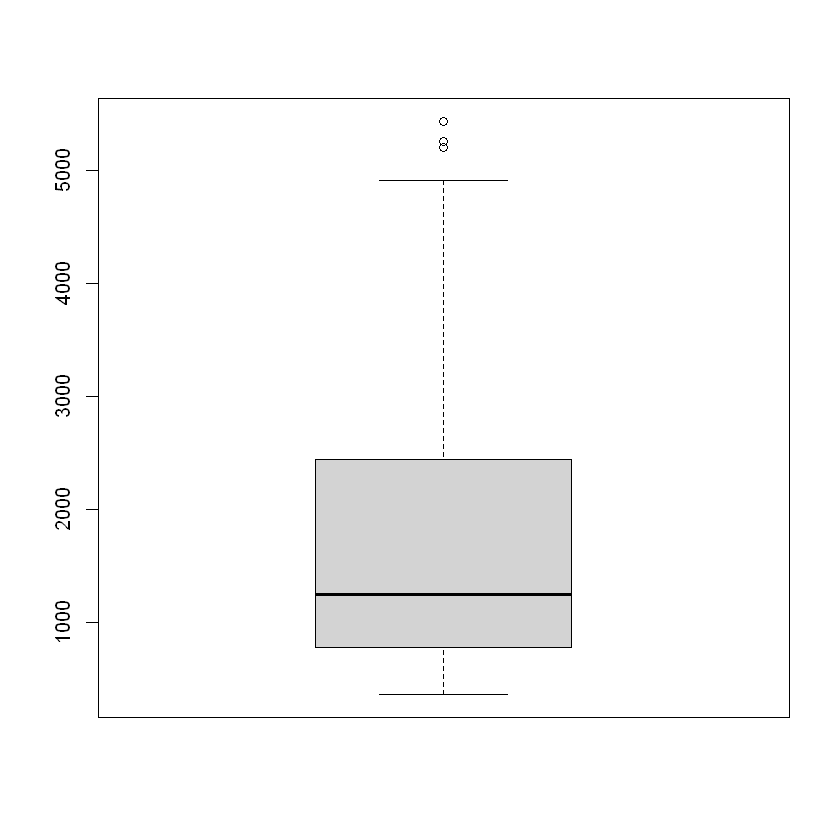

In [21]:
# 가격 분석 - 1 carat 넘으면 가격 이사이 발생
boxplot(Sample2$price)

섬세한 그래프를 그려 데이터 분석하기 - ggplot()

In [22]:
# 데이터 확인
library("ggplot2")
library("ggthemes")
str(diamonds)

tibble [53,940 x 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:53940] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:53940] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:53940] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:53940] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:53940] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:53940] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:53940] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


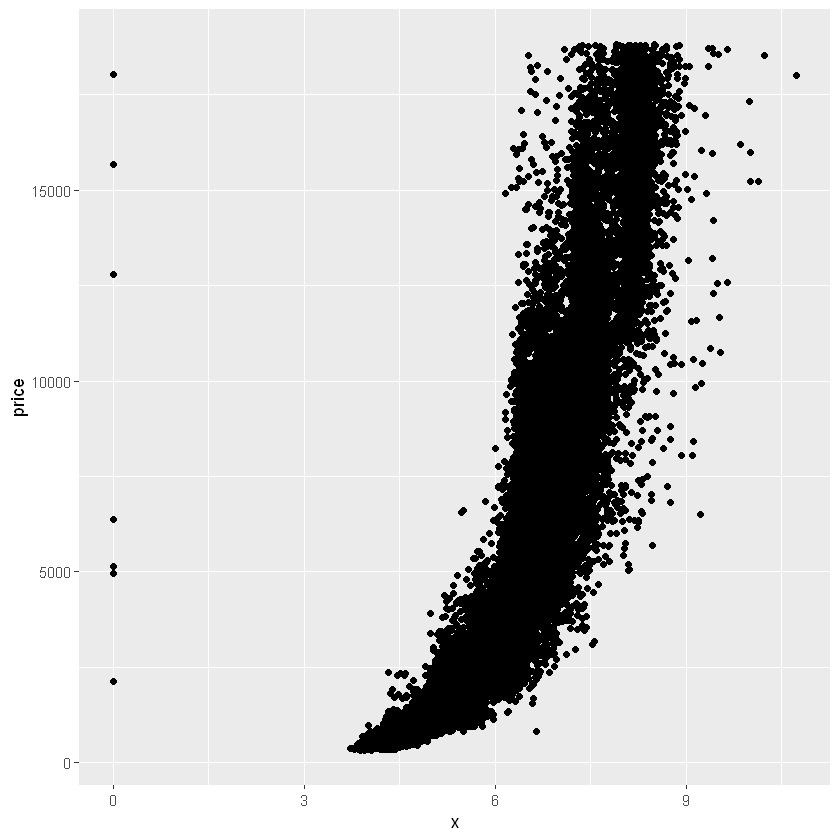

In [23]:
# x와 price 산점도 그리기
ggplot(diamonds, aes(x=x, y=price)) + geom_point()

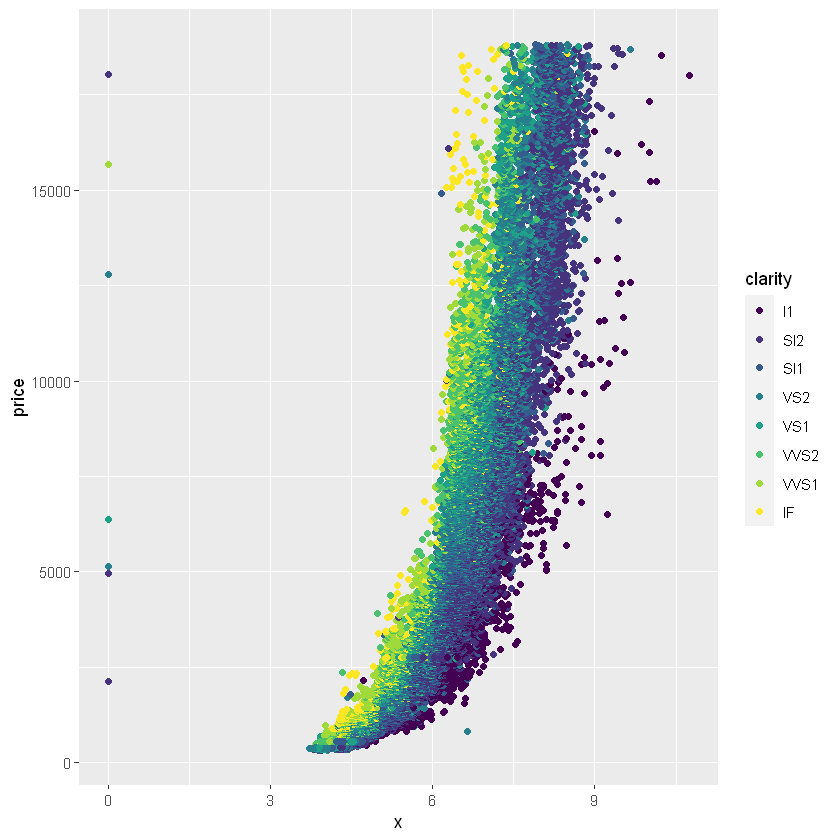

In [24]:
# clarity 변수 컬러에 추가
# clarity는 여러 값에 분포되어 있어  price에 영향은 없는듯

ggplot(diamonds, aes(x=x, y=price, colour=clarity)) + 
geom_point()

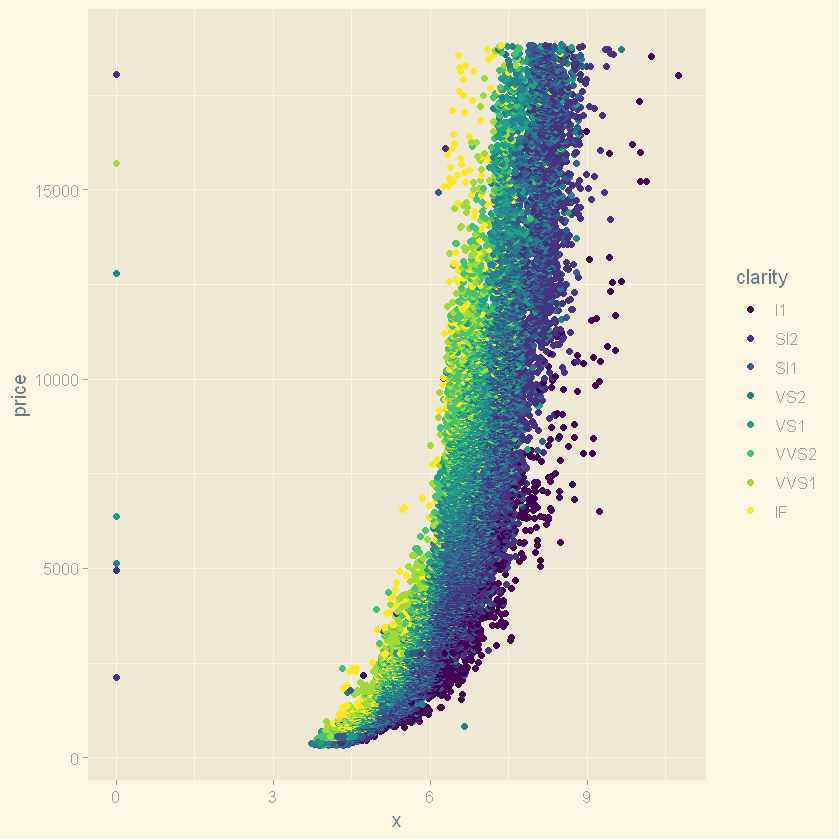

In [25]:
# 테마 적용
ggplot(diamonds, aes(x=x, y=price, colour=clarity)) + 
geom_point() + 
theme_solarized_2()

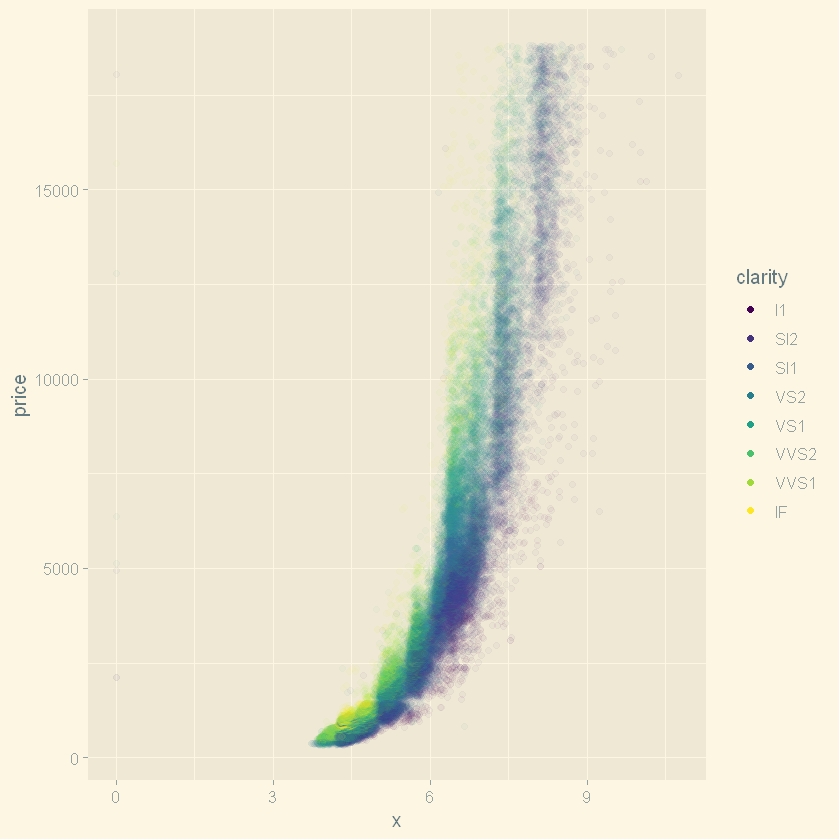

In [26]:
# 데이터 겹침 조절 - alphaa
# price 8000 정도까지 몰려 있음
ggplot(diamonds, aes(x=x, y=price, colour=clarity)) + 
geom_point(alpha=0.03) + 
guides(colour = guide_legend(override.aes = list(alpha = 1))) + 
theme_solarized_2()

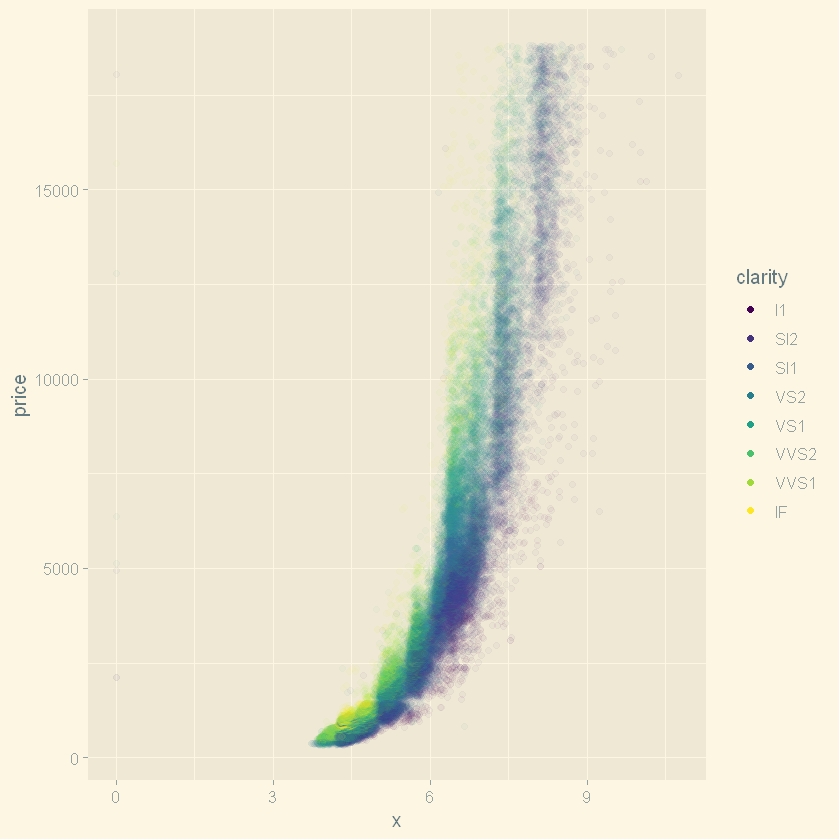

In [27]:
# legend 만 alpha 값 1 - guide()
ggplot(diamonds, aes(x=x, y=price, colour=clarity)) + 
geom_point(alpha=0.03) + 
guides(colour = guide_legend(override.aes = list(alpha = 1))) + 
theme_solarized_2()

Warning message:
"Removed 50 rows containing missing values (geom_point)."


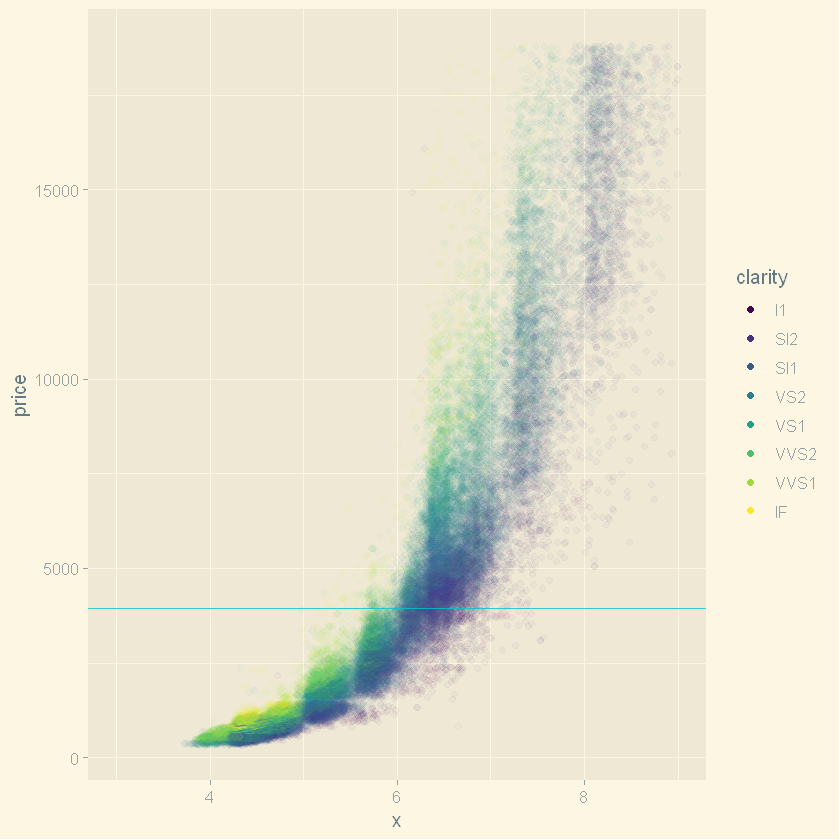

In [28]:
# x축 범위 조절(3~9), 수평선으로 평균 표시 geom_hline()
ggplot(diamonds, aes(x=x, y=price, colour=clarity)) +
geom_point(alpha=0.03) +
geom_hline(yintercept=mean(diamonds$price), color="turquoise3", alpha=.8) + 
guides(colour = guide_legend(override.aes = list(alpha = 1))) +
xlim(3,9) +
theme_solarized_2()

In [29]:
# 데이터 로드 - 간단한 시간대별 매출 자료
TS <- read.csv("rggagi/example_ts.csv")
str(TS)
head(TS)

'data.frame':	24 obs. of  2 variables:
 $ Date : num  2014 2014 2014 2014 2014 ...
 $ Sales: int  2000 2300 2400 2500 2800 3100 2900 3000 3300 3400 ...


,Date,Sales
,<dbl>,<int>
1,2014.01,2000
2,2014.02,2300
3,2014.03,2400
4,2014.04,2500
5,2014.05,2800
6,2014.06,3100


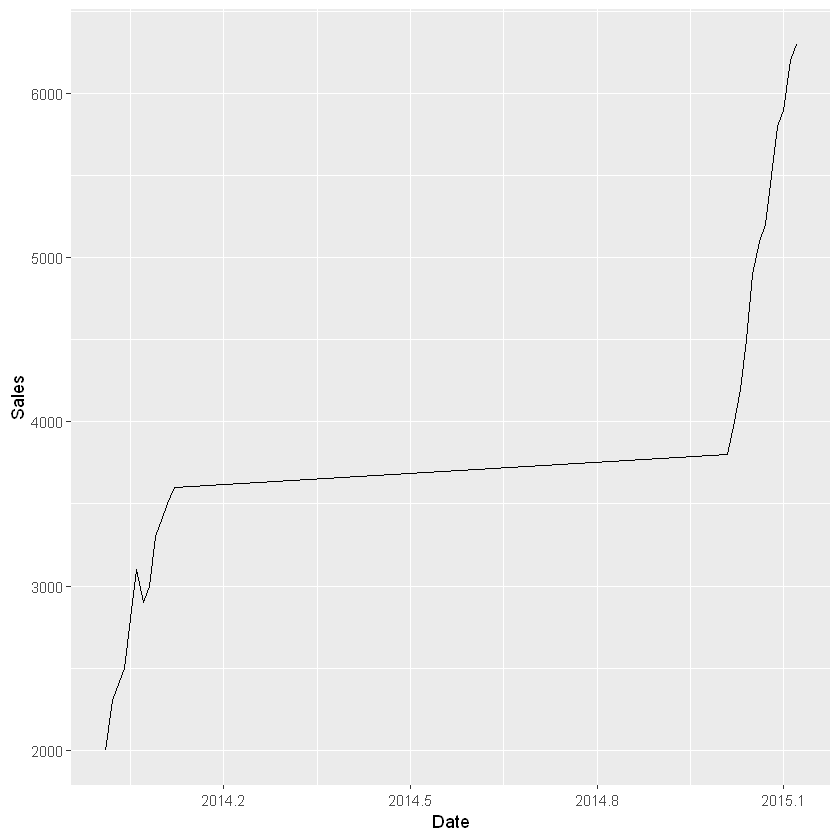

In [30]:
# 시각화 geom_line()
ggplot(TS, aes(x=Date, y=Sales)) + geom_line()


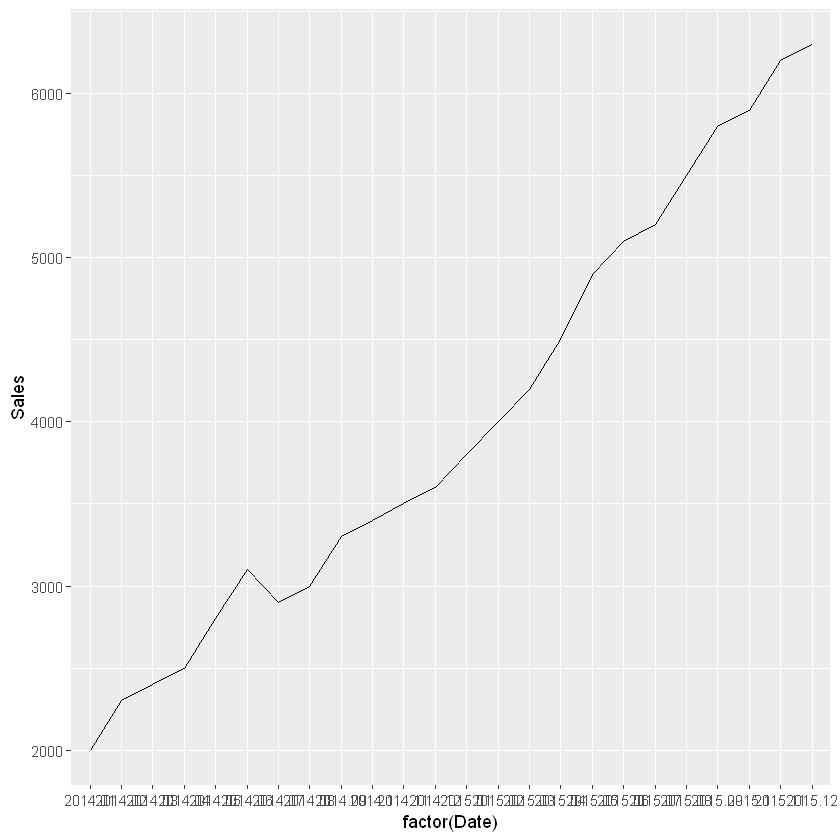

In [31]:
# x축에 날짜 모두 표시하기 - factor(), group=1 하나의 라인으로 연속 그릴 때 
ggplot(TS, aes(x=factor(Date), y=Sales, group=1)) + geom_line()

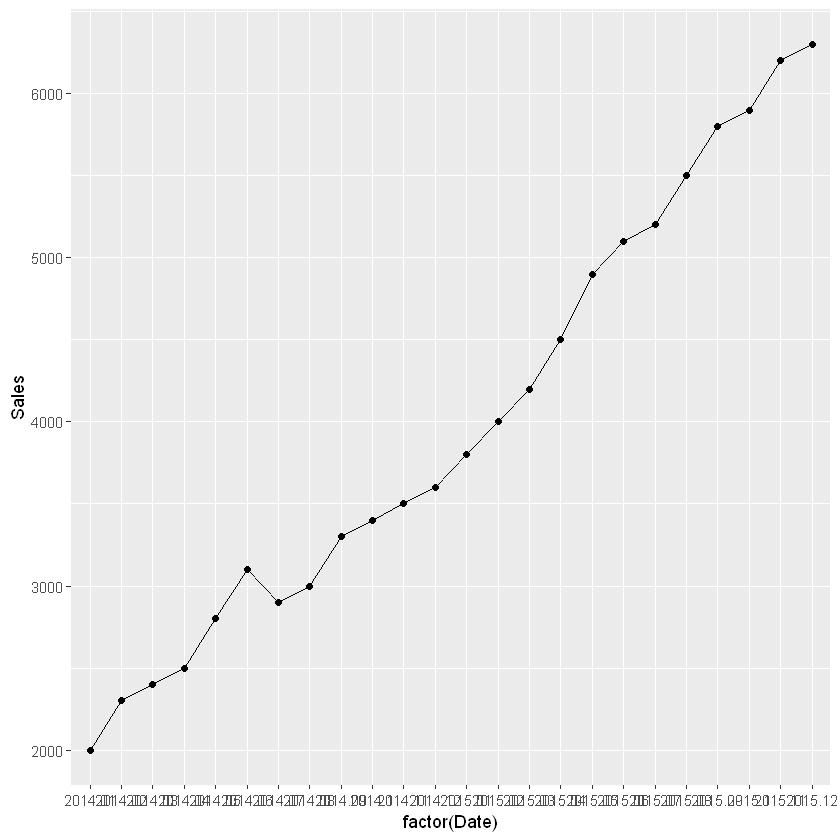

In [32]:
# 점 추가 geom_point()
ggplot(TS, aes(x=factor(Date), y=Sales, group=1)) + geom_line() + geom_point()

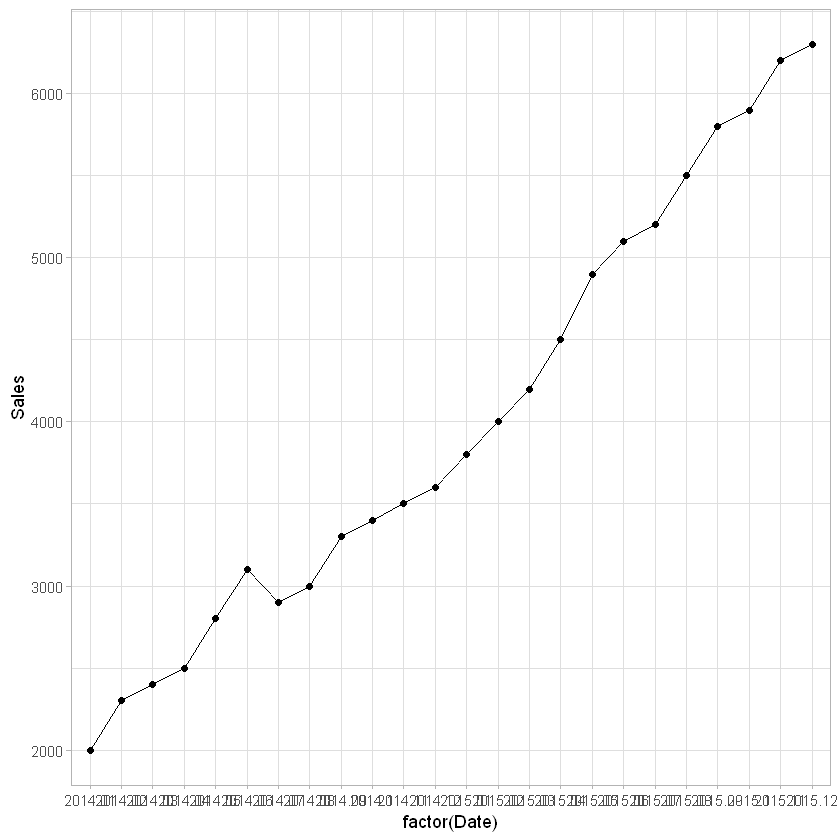

In [33]:
# 테마 적용
ggplot(TS, aes(x=factor(Date), y=Sales, group=1)) + geom_line() + geom_point() + theme_light()

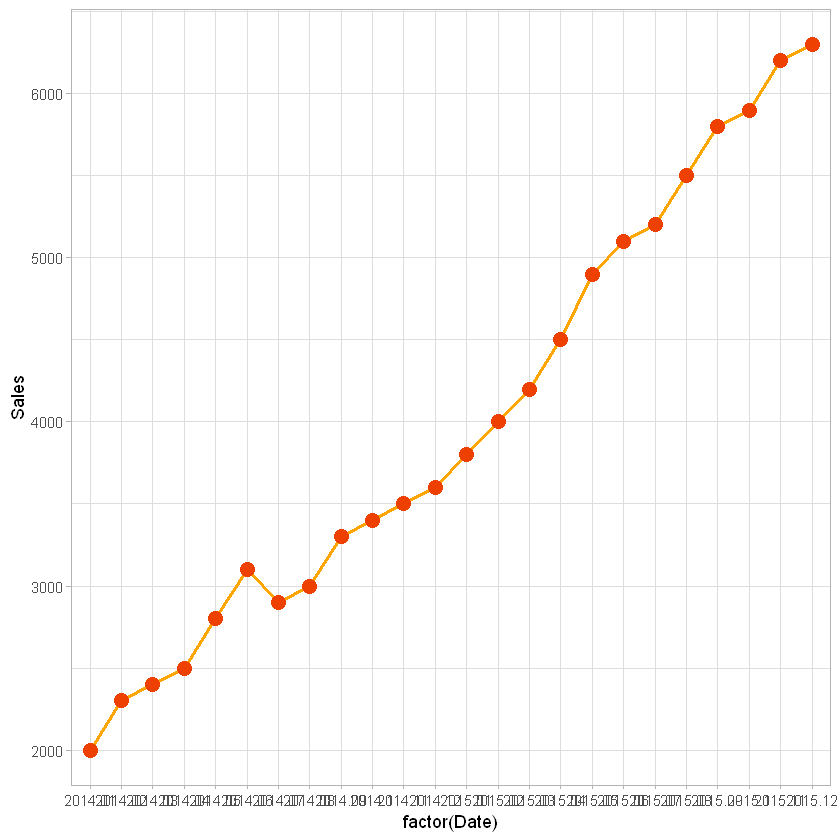

In [34]:
# 디자인 갑 변경
ggplot(TS, aes(x=factor(Date), y=Sales, group=1)) + 
geom_line(colour="orange1", size=1) + 
geom_point(colour="orangered2", size=4) + 
theme_light()

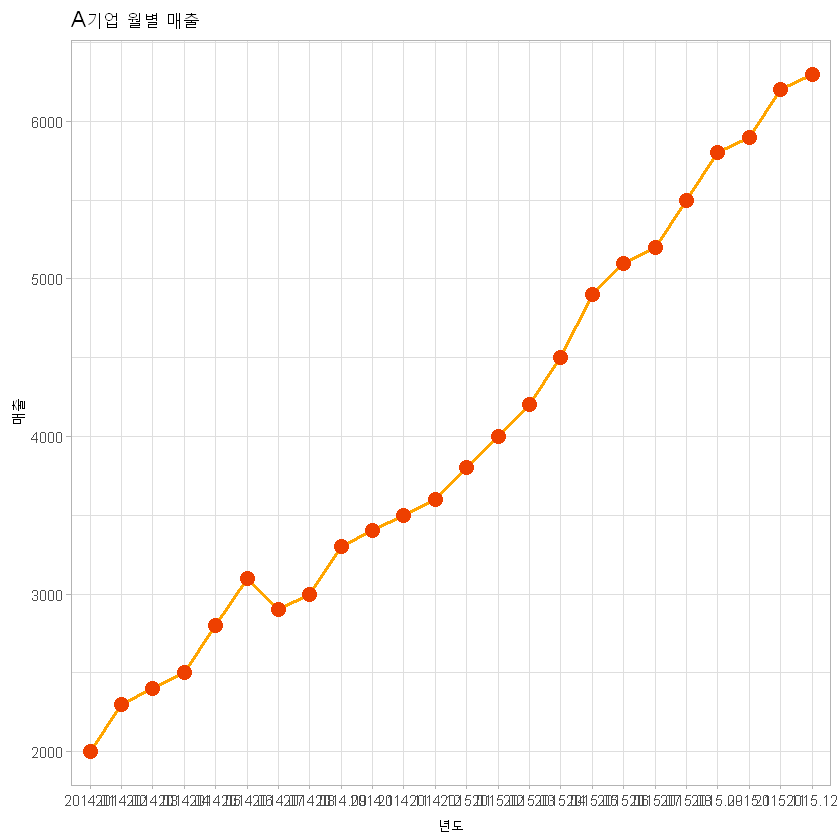

In [35]:
# title, x, y 축 이름 추가
ggplot(TS, aes(x=factor(Date), y=Sales, group=1)) +
geom_line(colour="orange1", size=1) + 
geom_point(colour="orangered2", size=4) + 
xlab("년도")+ ylab("매출") + ggtitle("A기업 월별 매출") + 
theme_light()

In [36]:
install.packages('dplyr')

package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\NOTEBOOK\.conda\envs\py38\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll를 C:\Users\NOTEBOOK\.conda\envs\py38\Lib\R\library\dplyr\libs\x64\dplyr.dll로 복사하는데 문제가 발생했습니다: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\NOTEBOOK\AppData\Local\Temp\RtmpYZwsTG\downloaded_packages


In [37]:
library("dplyr")
library("ggplot2")
library("ggthemes")



다음의 패키지를 부착합니다: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [38]:
# 데이터 로드 - 전국 인구조사 자료
DF <- read.csv("rggagi/example_population_f.csv")
DF <- DF[,-1] #첫번재 열은 ID숫자이기 때문에 삭제합니다.
DF <- tbl_df(DF) #tbl_df ( tibble diff라고도 함 ) 데이터 프레임 의 변형, dataframe + dplyr 속성추가
head(DF)


Warning message:
"`tbl_df()` was deprecated in dplyr 1.0.0.
Please use `tibble::as_tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated."


Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
서울특별시,중구,126817,59614,2.13,63292,63525,1.00
서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
서울특별시,성동구,298145,126915,2.35,148265,149880,0.99
서울특별시,광진구,362197,158769,2.28,177946,184251,0.97
서울특별시,동대문구,362604,160110,2.26,181825,180779,1.01


In [39]:
# 데이터 로드 - 전국 인구조사 자료
DF <- read.csv("rggagi/example_population_f.csv")
DF <- DF[,-1] #첫번재 열은 ID숫자이기 때문에 삭제합니다.
DF <- tbl_df(DF) #tbl_df ( tibble diff라고도 함 ) 데이터 프레임 의 변형, dataframe + dplyr 속성추가
head(DF)


Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
서울특별시,중구,126817,59614,2.13,63292,63525,1.00
서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
서울특별시,성동구,298145,126915,2.35,148265,149880,0.99
서울특별시,광진구,362197,158769,2.28,177946,184251,0.97
서울특별시,동대문구,362604,160110,2.26,181825,180779,1.01


In [40]:
# 충청도 도시들의 인구 그래프 그리기 - filter() 조건 vs subset()
DF2 <- filter(DF, Provinces=="충청북도" | Provinces=="충청남도")
head(DF2)


Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
충청북도,청주시,832387,334276,2.49,417505,414882,1.01
충청북도,청주시 상당구,178536,70873,2.52,89037,89499,0.99
충청북도,청주시 서원구,222817,88212,2.53,110729,112088,0.99
충청북도,청주시 흥덕구,251652,101572,2.48,126533,125119,1.01
충청북도,청주시 청원구,179382,73619,2.44,91206,88176,1.03
충청북도,충주시,208173,87078,2.39,104828,103345,1.01


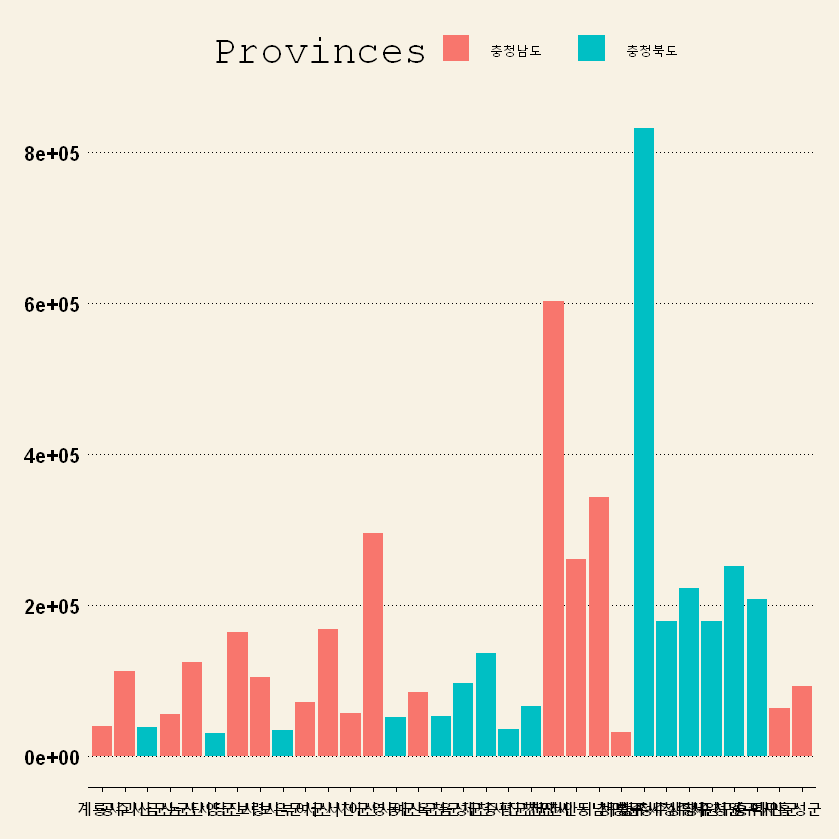

In [41]:
# 그래프 그리기
Graph <- ggplot(DF2, aes(x=City, y=Population, fill=Provinces)) + 
geom_bar(stat='identity') + theme_wsj()
Graph


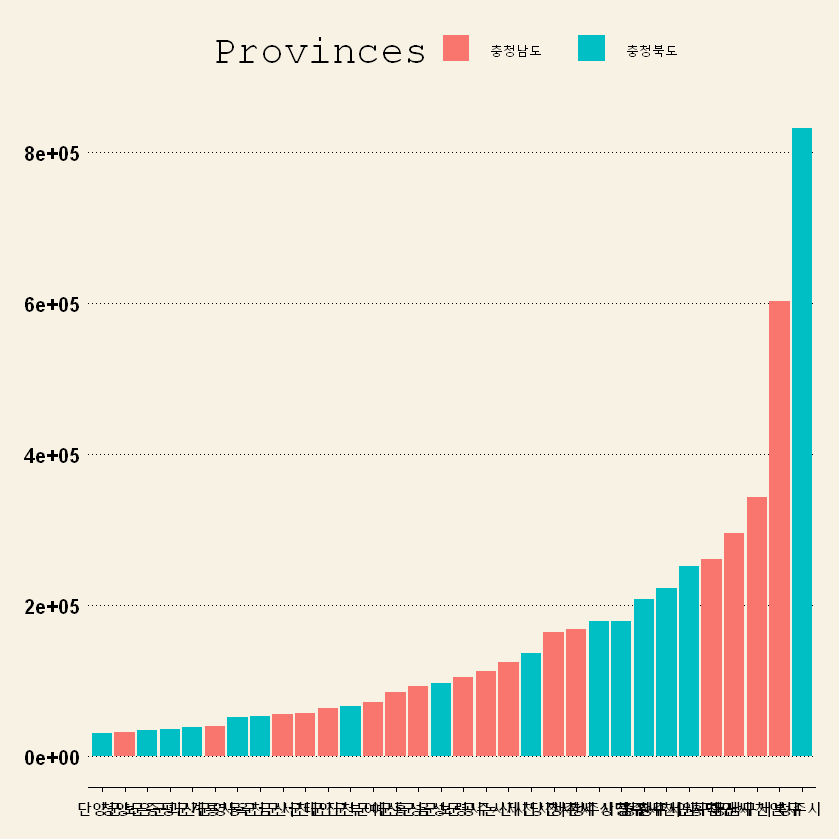

In [42]:
# 오름차순 정렬 - reorder() 
GraphReorder <- ggplot(DF2, aes(x=reorder(City, Population), y=Population, fill=Provinces)) + 
geom_bar(stat='identity') + theme_wsj()
GraphReorder


In [43]:
# 남자비율이 높고 1인가구가 많은 도시
DF3 <- filter(DF, SexRatio > 1, PersInHou < 2)
DF3


Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
인천광역시,옹진군,20825,11172,1.86,11715,9110,1.29
강원도,화천군,26790,13433,1.99,14989,11801,1.27
강원도,고성군,30066,15485,1.94,16109,13957,1.15
충청북도,괴산군,38027,19145,1.99,19309,18718,1.03
전라남도,신안군,43566,22248,1.96,22899,20667,1.11
경상북도,울릉군,10304,5365,1.92,5518,4786,1.15


#### dplyr 패키지로 데이터 만들고 그래프 나타내기 - mutate()

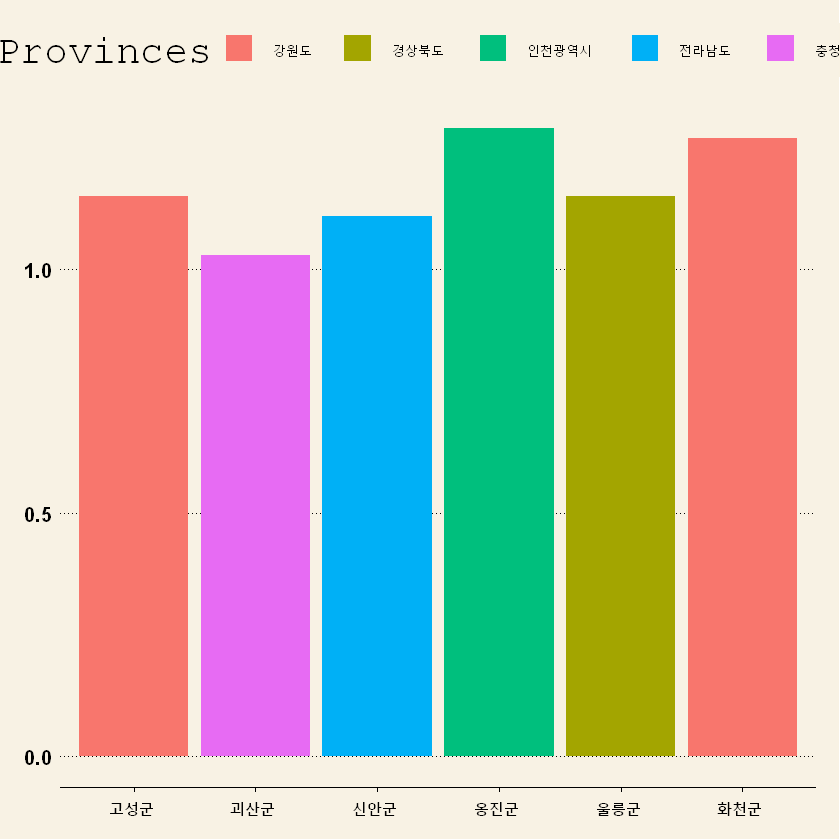

In [44]:
# 시각화
Graph <- ggplot(DF3, aes(x=City, y=SexRatio, fill=Provinces)) + 
geom_bar(stat='identity') + theme_wsj()
Graph


In [45]:
library("dplyr")
library("ggplot2")
library("ggthemes")


In [46]:
# 데이터 로드 - 전국 인구조사 자료
DF <- read.csv("rggagi/example_population_f.csv")
DF <- DF[,-1] #첫번재 열은 ID숫자이기 때문에 삭제합니다.
DF <- tbl_df(DF) #tbl_df ( tibble diff라고도 함 ) 데이터 프레임 의 변형, dataframe + dplyr 속성추가
head(DF)


Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
서울특별시,중구,126817,59614,2.13,63292,63525,1.00
서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
서울특별시,성동구,298145,126915,2.35,148265,149880,0.99
서울특별시,광진구,362197,158769,2.28,177946,184251,0.97
서울특별시,동대문구,362604,160110,2.26,181825,180779,1.01


In [47]:
# 남녀비율 문자로 나타내는 변수 추가 - mutate() vs cbind()
DF <- mutate(DF, 
             SexF = ifelse(SexRatio < 1, "여자비율높음", 
                           ifelse(SexRatio > 1, "남자비율높음", "남여비율같음")))
head(DF)


Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio,SexF
<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>
서울특별시,종로구,155695,72882,2.14,76962,78733,0.98,여자비율높음
서울특별시,중구,126817,59614,2.13,63292,63525,1.00,남여비율같음
서울특별시,용산구,235186,108138,2.17,114119,121067,0.94,여자비율높음
서울특별시,성동구,298145,126915,2.35,148265,149880,0.99,여자비율높음
서울특별시,광진구,362197,158769,2.28,177946,184251,0.97,여자비율높음
서울특별시,동대문구,362604,160110,2.26,181825,180779,1.01,남자비율높음


In [48]:
# SexF 순서있는 변수로 변환
DF$SexF <- factor(DF$SexF)
DF$SexF <- ordered(DF$SexF, c("여자비율높음", "남여비율같음", "남자비율높음"))

In [49]:
# 경기도 데이터 적재
DF2 <- filter(DF, Provinces=="경기도")


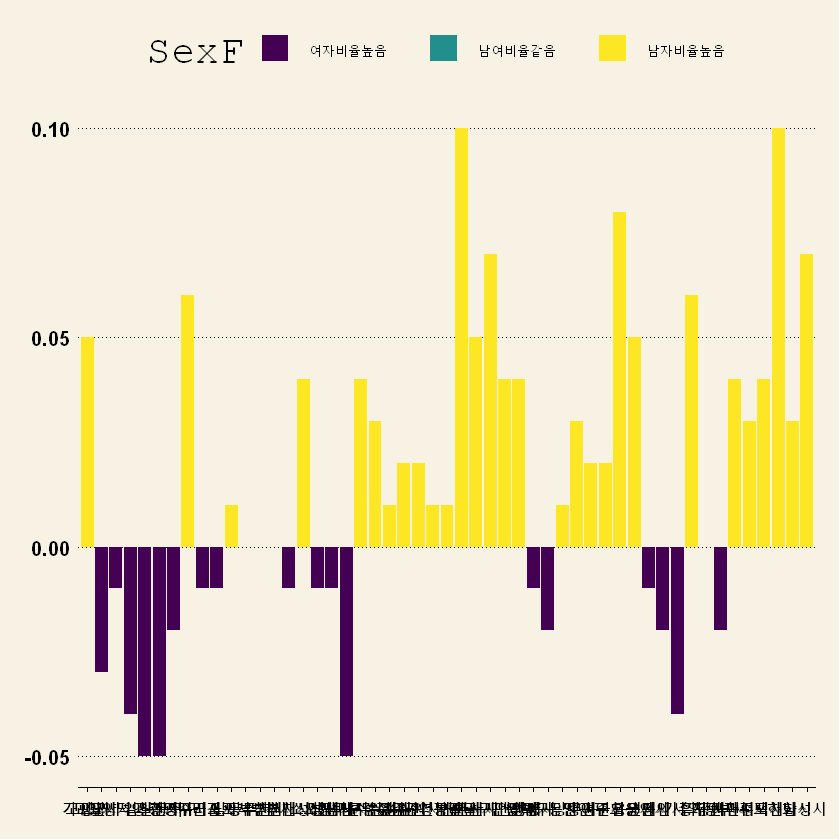

In [50]:
# 시각화 - 경기도 남자비율 높음
Graph <- ggplot(DF2, aes(x=City, y=(SexRatio-1), fill=SexF)) + 
geom_bar(stat='identity') + theme_wsj()
Graph

In [51]:
# 서울 데이터 적재
DF3 <- filter(DF, Provinces=="서울특별시")

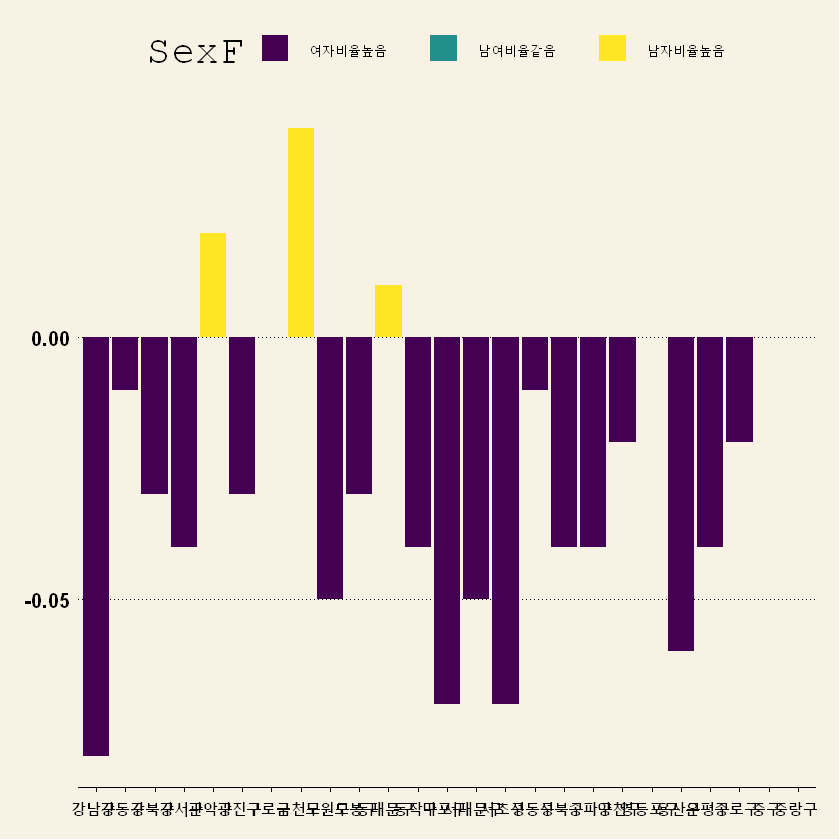

In [52]:
# 시각화 - 서울 여자 비율 높음
Graph2 <- ggplot(DF3, aes(x=City, y=(SexRatio-1), fill=SexF)) + 
geom_bar(stat='identity') + theme_wsj()
Graph2

In [53]:
library("dplyr")
library("ggplot2")
library("ggthemes")
library("reshape2")

In [54]:
# 데이터 로드 - 전국 인구조사 자료
DF <- read.csv("rggagi/example_population_f.csv")
DF <- DF[,-1] #첫번재 열은 ID숫자이기 때문에 삭제합니다.
DF <- tbl_df(DF) #tbl_df ( tibble diff라고도 함 ) 데이터 프레임 의 변형, dataframe + dplyr 속성추가
head(DF)

Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
서울특별시,중구,126817,59614,2.13,63292,63525,1.00
서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
서울특별시,성동구,298145,126915,2.35,148265,149880,0.99
서울특별시,광진구,362197,158769,2.28,177946,184251,0.97
서울특별시,동대문구,362604,160110,2.26,181825,180779,1.01


In [55]:
# 도별 합계 = 도시별(group by) 계산 summarise() 합계 sum()
group <- group_by(DF, Provinces) # 도시별
DF2 <- summarise(group, SumPopulation=sum(Population), Male=sum(Male), Female=sum(Female))
DF2

Provinces,SumPopulation,Male,Female
<chr>,<int>,<int>,<int>
강원도,1547166,780487,766679
경기도,18723822,9401705,9322117
경상남도,4428762,2235747,2193015
경상북도,3215695,1616853,1598842
광주광역시,1476974,731808,745166
대구광역시,2491137,1239275,1251862
대전광역시,1525656,763262,762394
부산광역시,3517491,1737975,1779516
서울특별시,10078850,4962774,5116076


In [56]:
# melt(DF2, measure.vars = 바꿀변수들) - 성별은 하나의 명목형 변수로 처리 하고 싶을 때
DF3 <- melt(DF2, measure.vars = c("Male", "Female"))

In [57]:
DF2
DF3

Provinces,SumPopulation,Male,Female
<chr>,<int>,<int>,<int>
강원도,1547166,780487,766679
경기도,18723822,9401705,9322117
경상남도,4428762,2235747,2193015
경상북도,3215695,1616853,1598842
광주광역시,1476974,731808,745166
대구광역시,2491137,1239275,1251862
대전광역시,1525656,763262,762394
부산광역시,3517491,1737975,1779516
서울특별시,10078850,4962774,5116076


Provinces,SumPopulation,variable,value
<chr>,<int>,<fct>,<int>
강원도,1547166,Male,780487
경기도,18723822,Male,9401705
경상남도,4428762,Male,2235747
경상북도,3215695,Male,1616853
광주광역시,1476974,Male,731808
대구광역시,2491137,Male,1239275
대전광역시,1525656,Male,763262
부산광역시,3517491,Male,1737975
서울특별시,10078850,Male,4962774


In [58]:
colnames(DF3)[3] <- "Sex"
colnames(DF3)[4] <- "Population"
head(DF3)

,Provinces,SumPopulation,Sex,Population
,<chr>,<int>,<fct>,<int>
1,강원도,1547166,Male,780487
2,경기도,18723822,Male,9401705
3,경상남도,4428762,Male,2235747
4,경상북도,3215695,Male,1616853
5,광주광역시,1476974,Male,731808
6,대구광역시,2491137,Male,1239275


In [59]:
# 남녀 비율 추가
DF4 <- mutate(DF3, Ratio = Population/SumPopulation)
DF4$Ratio <- round(DF4$Ratio, 3)
head(DF4)

,Provinces,SumPopulation,Sex,Population,Ratio
,<chr>,<int>,<fct>,<int>,<dbl>
1,강원도,1547166,Male,780487,0.504
2,경기도,18723822,Male,9401705,0.502
3,경상남도,4428762,Male,2235747,0.505
4,경상북도,3215695,Male,1616853,0.503
5,광주광역시,1476974,Male,731808,0.495
6,대구광역시,2491137,Male,1239275,0.497


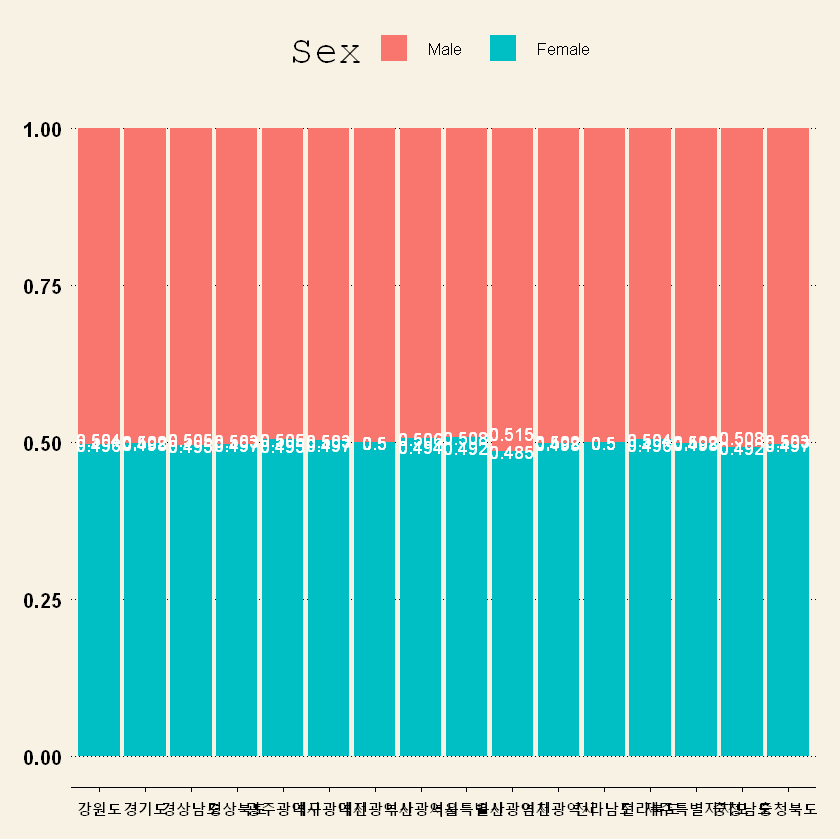

In [60]:
# 시각화
G1 <- ggplot(DF4, aes(x=Provinces, y=Ratio, fill=Sex)) + 
geom_bar(stat='identity') + 
#coord_cartesian(ylim = c(0.45, 0.55)) + 
theme_wsj()

G2 <- geom_text(aes(y=Ratio, label=Ratio), colour="white")

G1 + G2

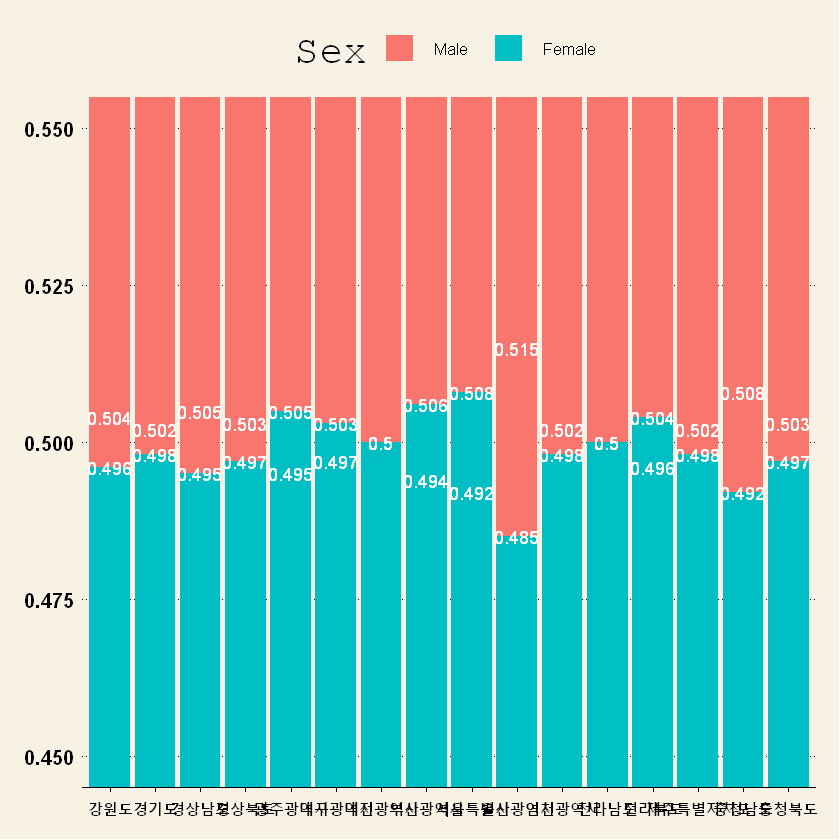

In [61]:
# 시각화 - coord_cartesian() 부분 확대
G1 <- ggplot(DF4, aes(x=Provinces, y=Ratio, fill=Sex)) + 
geom_bar(stat='identity') + 
coord_cartesian(ylim = c(0.45, 0.55)) + 
theme_wsj()

G2 <- geom_text(aes(y=Ratio, label=Ratio), colour="white")

G1 + G2

In [62]:
# 비율값 위치 조정
DF4 <- mutate(DF4, Position = ifelse(Sex == "Male", 0.475, 0.525))
head(DF4)

,Provinces,SumPopulation,Sex,Population,Ratio,Position
,<chr>,<int>,<fct>,<int>,<dbl>,<dbl>
1,강원도,1547166,Male,780487,0.504,0.475
2,경기도,18723822,Male,9401705,0.502,0.475
3,경상남도,4428762,Male,2235747,0.505,0.475
4,경상북도,3215695,Male,1616853,0.503,0.475
5,광주광역시,1476974,Male,731808,0.495,0.475
6,대구광역시,2491137,Male,1239275,0.497,0.475


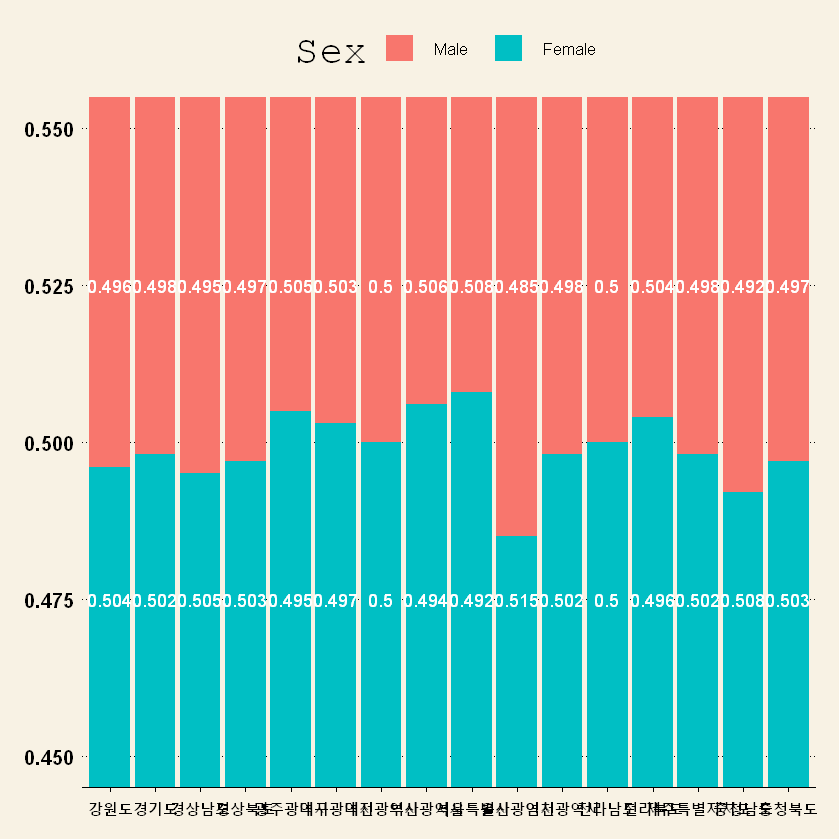

In [63]:
# 시각화 - geom_text()
G1 <- ggplot(DF4, aes(x=Provinces, y=Ratio, fill=Sex)) + 
geom_bar(stat='identity') + 
coord_cartesian(ylim = c(0.45, 0.55)) + theme_wsj()
G2 <- geom_text(aes(y=Position, label=Ratio), colour="white")
G1 + G2

In [65]:
require("dplyr")
require("ggplot2")
require("ggthemes")


In [66]:
# 데이터 로드 - 전국 인구조사 자료
DF <- read.csv("rggagi/example_population_f.csv")
DF <- DF[,-1] #첫번재 열은 ID숫자이기 때문에 삭제합니다.
DF <- tbl_df(DF) #tbl_df ( tibble diff라고도 함 ) 데이터 프레임 의 변형, dataframe + dplyr 속성추가
head(DF)


Provinces,City,Population,Households,PersInHou,Male,Female,SexRatio
<chr>,<chr>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
서울특별시,종로구,155695,72882,2.14,76962,78733,0.98
서울특별시,중구,126817,59614,2.13,63292,63525,1.00
서울특별시,용산구,235186,108138,2.17,114119,121067,0.94
서울특별시,성동구,298145,126915,2.35,148265,149880,0.99
서울특별시,광진구,362197,158769,2.28,177946,184251,0.97
서울특별시,동대문구,362604,160110,2.26,181825,180779,1.01


In [67]:
# 남녀비율 명목형 변수로 만들기
DF2 <- mutate(DF, SexF = ifelse(SexRatio > 1, "남자비율높음", 
                                ifelse(SexRatio == 1, "남녀비율같음", "여자비율높음")))


In [68]:
# 경기도 데이터 적재
DF3 <- filter(DF2, Provinces=="경기도")


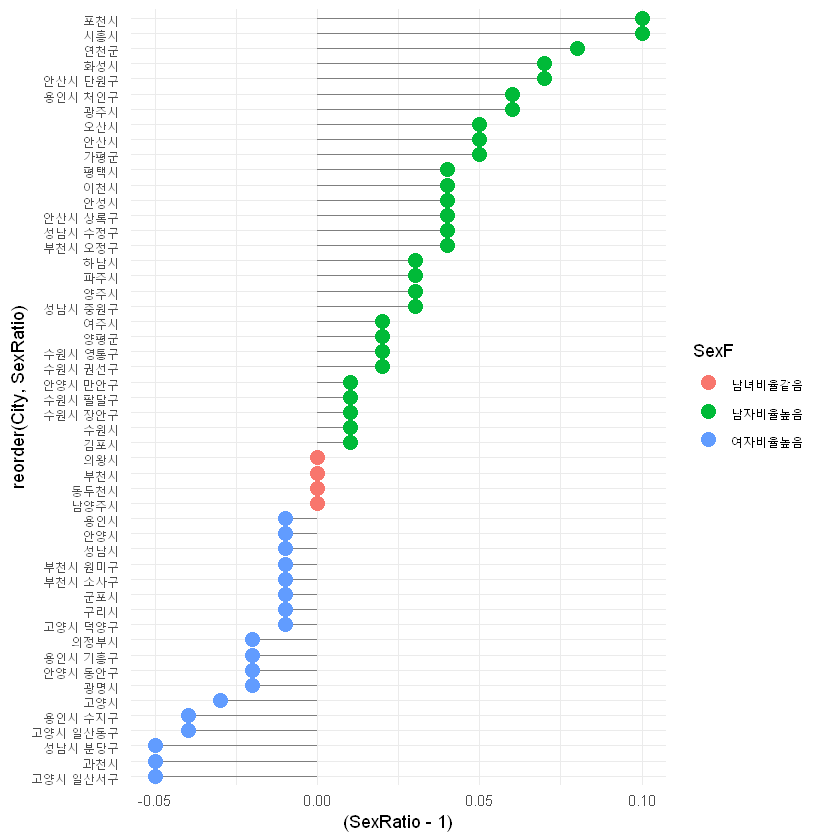

In [69]:
# 시각화 - geom_segment() x축 시작위치 xend=0, y축 명목형 변수 yend=City
Graph <- ggplot(DF3, aes(x=(SexRatio-1), y=reorder(City, SexRatio))) + 
geom_segment(aes(yend=City), xend=0, colour="grey50") + 
geom_point(size=4, aes(colour=SexF)) + theme_minimal()
Graph


### 시간에 따른 연령별 인구 변화 그래프 그리기
- DataSet : 통계청 사이트에서 Download (www.kosis.or.kr)


In [70]:
library("dplyr")
library("ggplot2")
library("ggthemes")
library("reshape2")
library("scales") # 2e_07 => 200,000 표시

In [71]:
# 데이터 로드 - 시간별 인구변화 자료
DF <- read.csv('rggagi/example_population2.csv')
DF <- tbl_df(DF)


In [72]:
head(DF)


Time,Sex,Population,age0to4,age5to9,age10to14,age15to19,age20to24,age25to29,age30to34,⋯,age60to64,age65to69,age70to74,age75to79,age80to84,age85to89,age90to94,age95to99,age100to104,age105to109
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>
1960,Male,12550691,2383544,1733443,1358903,1248858,1171363,960543,738376,⋯,230431,141661,80707,45335,NA,NA,NA,NA,NA,NA
1960,Female,12461683,2207268,1617090,1287335,1169586,1151342,972537,817952,⋯,288034,204014,129687,65864,NA,NA,NA,NA,NA,NA
1961,Male,12936583,2452879,1864580,1402613,1240278,1188724,1017695,765035,⋯,239434,141887,84914,47111,NA,NA,NA,NA,NA,NA
1961,Female,12829090,2276565,1736162,1332220,1145417,1175745,1010896,844596,⋯,296408,202677,139524,69374,NA,NA,NA,NA,NA,NA
1962,Male,13320983,2500793,1983775,1448949,1255899,1204229,1065655,793285,⋯,241992,148284,86420,49893,NA,NA,NA,NA,NA,NA
1962,Female,13192047,2323482,1846082,1369542,1150735,1192695,1051348,874853,⋯,296126,212423,140591,76638,NA,NA,NA,NA,NA,NA


In [73]:
# 남녀를 합쳐 새로운 datafram 생성 5세 => 10세 단위
group <- group_by(DF, Time)
DF2 <- summarise(group, s0=sum(age0to4, age5to9),
                 s10=sum(age10to14, age15to19),
                 s20=sum(age20to24, age25to29),
                 s30=sum(age30to34, age35to39),
                 s40=sum(age40to44, age45to49),
                 s50=sum(age50to54, age55to59),
                 s60=sum(age60to64, age65to69),
                 s70=sum(age70to74, age75to79),
                 s80=sum(age80to84, age85to89),
                 s90=sum(age90to94, age95to99),
                 s100=sum(age100to104, age105to109))


In [74]:
head(DF2)


Time,s0,s10,s20,s30,s40,s50,s60,s70,s80,s90,s100
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1960,7941345,5064682,4255785,2926453,2104964,1474230,864140,321593,NA,NA,NA
1961,8330186,5120528,4393060,2987916,2154627,1492633,880406,340923,NA,NA,NA
1962,8654132,5225125,4513927,3061297,2210697,1527018,898825,353542,NA,NA,NA
1963,8955786,5375068,4590600,3148634,2273571,1576341,911748,357878,NA,NA,NA
1964,9155797,5598769,4640279,3271141,2328024,1623340,912204,379013,NA,NA,NA
1965,9260938,5924880,4654662,3400903,2385998,1665823,934334,397242,NA,NA,NA


In [75]:
DF3 <- melt(DF2, measure.vars=c("s0", "s10", "s20", "s30", "s40", "s50", "s60", "s70", "s80", "s90", "s100"))
head(DF3)
colnames(DF3) <- c("Time", "Generation", "Population")


,Time,variable,value
,<int>,<fct>,<int>
1,1960,s0,7941345
2,1961,s0,8330186
3,1962,s0,8654132
4,1963,s0,8955786
5,1964,s0,9155797
6,1965,s0,9260938


In [76]:
head(DF3)


,Time,Generation,Population
,<int>,<fct>,<int>
1,1960,s0,7941345
2,1961,s0,8330186
3,1962,s0,8654132
4,1963,s0,8955786
5,1964,s0,9155797
6,1965,s0,9260938


Warning message:
"Removed 141 rows containing missing values (position_stack)."


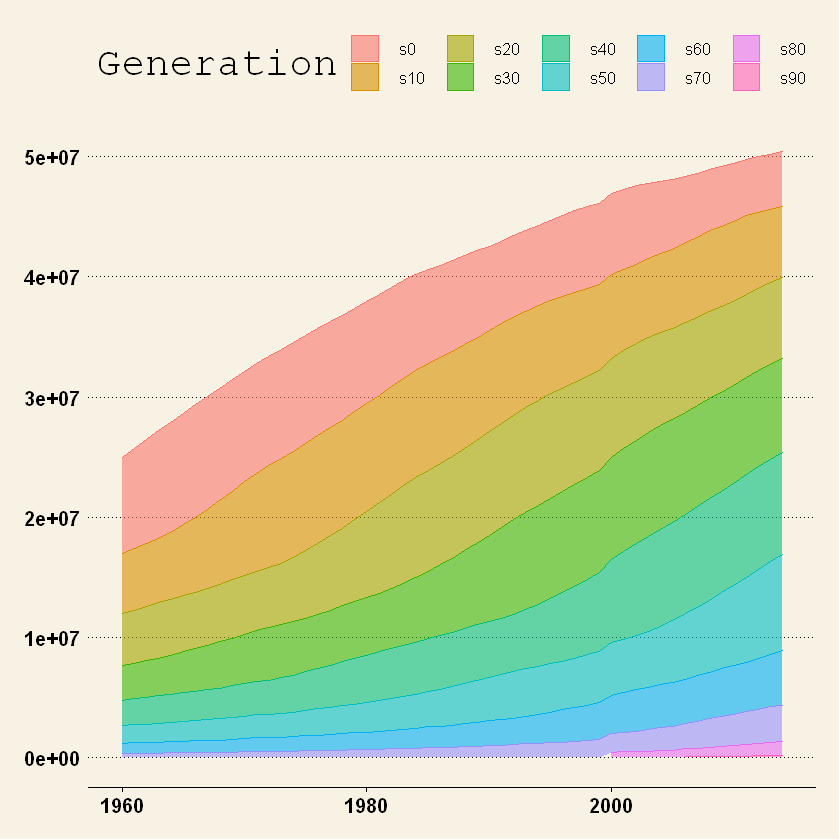

In [77]:
# 시각화 - geom_area() 영역 그래프
G1 <- ggplot(DF3, aes(x=Time, y=Population, colour=Generation, fill=Generation)) + 
geom_area(alpha=.6) + theme_wsj()
G1


Warning message:
"Removed 141 rows containing missing values (position_stack)."


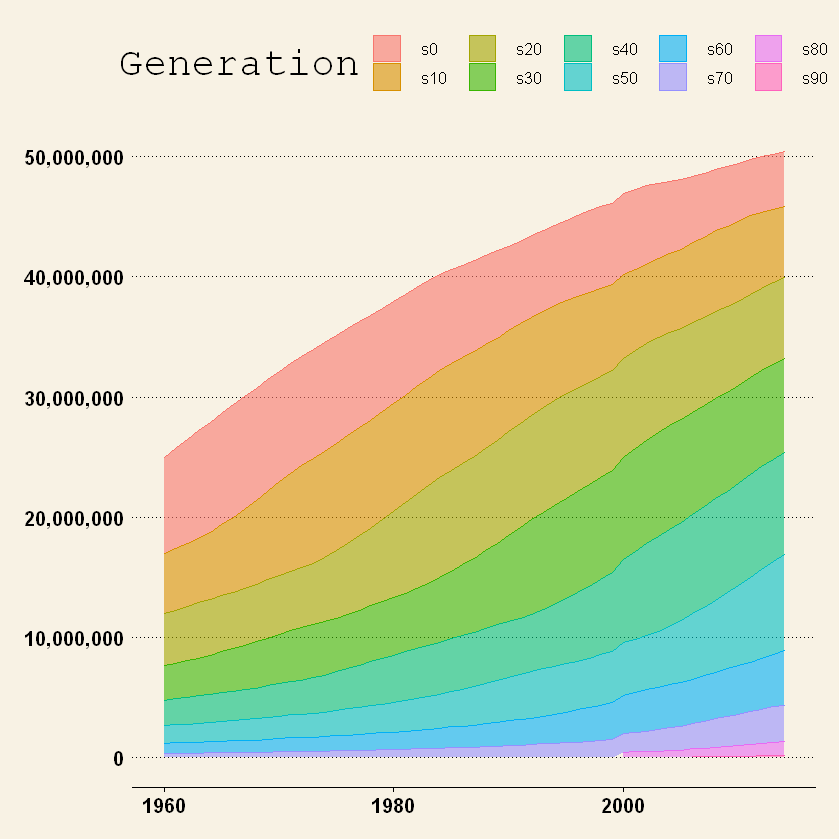

In [78]:
# y축 값 변경 - scale_y_continuous(labels = comma)
G2 <- ggplot(DF3, aes(x=Time, y=Population, colour=Generation, fill=Generation)) + 
geom_area(alpha=.6) + theme_wsj()
G2 + scale_y_continuous(labels = comma)
